In [51]:
hpath = "/home/xy/";
include(joinpath(hpath, "xylib.jl"));
include("MC.jl");

In [50]:
city = "Basel"
fn = joinpath(hpath, "01mc/camsRad_Basel.nc")
fn_w = joinpath(hpath, "01mc/camsRad_Basel_w.nc"); # neib 2024

In [3]:
const N = 20;

In [2]:
city = "Berlin"
fn = joinpath(hpath, "01mc/01mc/irradiation2020_Berlin.nc");

In [13]:
ncinfo(fn_city)


##### NetCDF File #####

/home/xy/01mc/camsRad_Basel.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
altitude                                            1                         
latitude                                            1                         
time                                                733440                    
longitude                                           1                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
rely                            DOUBLE          longitude latitude altitude ti..
altitude                        DOUBLE          altitude                        
time                            INT             time                            
CLEAR_SKY_DHI

In [6]:
df_b = getCmf(fn)

375911×8 DataFrame
    Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf      
        │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64  
────────┼─────────────────────────────────────────────────────────────
      1 │  2004     2     1     7    15   1.35392   1.35392  1.0
      2 │  2004     2     1     7    30   6.74677   6.74677  1.0
      3 │  2004     2     1     7    45  14.2503   14.2503   1.0
      4 │  2004     2     1     8     0  22.7685   22.7685   1.0
      5 │  2004     2     1     8    15  31.7022   31.7022   1.0
      6 │  2004     2     1     8    30  40.6887   40.6887   1.0
      7 │  2004     2     1     8    45  49.495    49.495    1.0
      8 │  2004     2     1     9     0  57.9624   57.9624   1.0
      9 │  2004     2     1     9    15  65.9634   65.9634   1.0
     10 │  2004     2     1     9    30  73.4146   73.4146   1.0
     11 │  2004     2     1     9    45  80.2612   80.2612   1.0
   ⋮    │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮
 375902 │  2024    12    31    13    30  53.0683   62.9748   0.842691
 375903 │  2024    12    31    13    45  50.1113   56.9427   0.88003
 375904 │  2024    12    31    14     0  48.6099   50.3335   0.965755
 375905 │  2024    12    31    14    15  40.4794   43.2249   0.936483
 375906 │  2024    12    31    14    30  32.5591   35.7197   0.911515
 375907 │  2024    12    31    14    45  27.2007   27.9615   0.972791
 375908 │  2024    12    31    15     0  20.1632   20.1632   1.0
 375909 │  2024    12    31    15    15  12.6783   12.6783   1.0
 375910 │  2024    12    31    15    30   6.02951   6.02951  1.0
 375911 │  2024    12    31    15    45   1.17089   1.17089  1.0
                                                   375890 rows omitted

In [7]:
df_b_w = getCmf(fn_w)

35955×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2023     1     1     7    30   0.271946   0.271946  1.0
     2 │  2023     1     1     7    45   3.70175    3.70175   1.0
     3 │  2023     1     1     8     0   9.60592    9.60592   1.0
     4 │  2023     1     1     8    15  16.5511    16.5511    1.0
     5 │  2023     1     1     8    30  23.8805    23.8805    1.0
     6 │  2023     1     1     8    45  31.2263    31.2263    1.0
     7 │  2023     1     1     9     0  38.1015    38.3652    0.993127
     8 │  2023     1     1     9    15  39.0661    45.1789    0.8647
     9 │  2023     1     1     9    30  48.8989    51.567     0.948259
    10 │  2023     1     1     9    45  57.4232    57.4232    1.0
    11 │  2023     1     1    10     0  62.6839    62.6839    1.0
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 35946 │  2024    12    31    13    30  55.2685    62.9748    0.877629
 35947 │  2024    12    31    13    45  47.6489    56.9427    0.836788
 35948 │  2024    12    31    14     0  44.0202    50.3335    0.874569
 35949 │  2024    12    31    14    15  41.6635    43.2249    0.963877
 35950 │  2024    12    31    14    30  33.3848    35.7197    0.934634
 35951 │  2024    12    31    14    45  25.479     27.9615    0.911216
 35952 │  2024    12    31    15     0  19.6076    20.1632    0.972444
 35953 │  2024    12    31    15    15  12.6783    12.6783    1.0
 35954 │  2024    12    31    15    30   6.02951    6.02951   1.0
 35955 │  2024    12    31    15    45   1.17089    1.17089   1.0
                                                     35934 rows omitted

### diurnal

In [6]:
df = filter([:yr, :mon, :day]=>(y,m,d) -> (y==2024 && m==12 && d==1), df_b) #1≤d≤3
transform!(df, [:hr,:min] => ByRow((h,mi) -> Time(h,mi)) => :dt)

31×9 DataFrame
 Row │ yr     mon   day   hr    min   ghi        ghiCS     cmf       dt       
     │ Int16  Int8  Int8  Int8  Int8  Float64    Float64   Float64   Time     
─────┼────────────────────────────────────────────────────────────────────────
   1 │  2020    12     1     7    15   0.389123   1.04791  0.371334  07:15:00
   2 │  2020    12     1     7    30   3.67903    4.69728  0.783225  07:30:00
   3 │  2020    12     1     7    45   7.99173    9.56075  0.835889  07:45:00
   4 │  2020    12     1     8     0   8.95166   15.0397   0.5952    08:00:00
   5 │  2020    12     1     8    15   8.70018   20.7533   0.41922   08:15:00
   6 │  2020    12     1     8    30   5.15139   26.4462   0.194787  08:30:00
   7 │  2020    12     1     8    45   3.89074   31.9411   0.12181   08:45:00
   8 │  2020    12     1     9     0   6.20733   37.1102   0.167268  09:00:00
   9 │  2020    12     1     9    15   6.58671   41.832    0.157456  09:15:00
  10 │  2020    12     1     9    30   7.39161   46.0313   0.160578  09:30:00
  11 │  2020    12     1     9    45   6.12333   49.6788   0.123258  09:45:00
  ⋮  │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮         ⋮         ⋮         ⋮
  22 │  2020    12     1    12    30  22.1327    46.9294   0.471617  12:30:00
  23 │  2020    12     1    12    45  21.1742    42.7825   0.494927  12:45:00
  24 │  2020    12     1    13     0  18.9863    38.1381   0.497832  13:00:00
  25 │  2020    12     1    13    15  17.5522    33.0702   0.530754  13:15:00
  26 │  2020    12     1    13    30  15.7121    27.6758   0.567718  13:30:00
  27 │  2020    12     1    13    45  14.8624    22.0835   0.673011  13:45:00
  28 │  2020    12     1    14     0  11.696     16.4651   0.710348  14:00:00
  29 │  2020    12     1    14    15   8.6189    11.0521   0.779839  14:15:00
  30 │  2020    12     1    14    30   4.70538    6.15517  0.76446   14:30:00
  31 │  2020    12     1    14    45   1.04847    2.1867   0.479474  14:45:00
                                                               10 rows omitted

In [12]:
df = filter([:mon, :day]=>(m,d) -> (m==10 && d==1), df_b) #1≤d≤3
transform!(df, [:hr,:min] => ByRow((h,mi) -> Time(h,mi)) => :dt)

46×9 DataFrame
 Row │ yr     mon   day   hr    min   ghi         ghiCS       cmf       dt       
     │ Int16  Int8  Int8  Int8  Int8  Float64     Float64     Float64   Time     
─────┼───────────────────────────────────────────────────────────────────────────
   1 │  2020    10     1     5    30   1.12972      2.16567   0.521651  05:30:00
   2 │  2020    10     1     5    45   6.2401       7.60027   0.821036  05:45:00
   3 │  2020    10     1     6     0   8.90258     14.8212    0.600667  06:00:00
   4 │  2020    10     1     6    15  10.6574      23.0843    0.461673  06:15:00
   5 │  2020    10     1     6    30   9.14635     31.9031    0.286692  06:30:00
   6 │  2020    10     1     6    45  12.2728      40.9864    0.299435  06:45:00
   7 │  2020    10     1     7     0  18.6276      50.122     0.371645  07:00:00
   8 │  2020    10     1     7    15  25.4778      59.1569    0.430682  07:15:00
   9 │  2020    10     1     7    30  30.6512      67.9757    0.450915  07:30:00
  10 │  2020    10     1     7    45  32.8146      76.4867    0.429024  07:45:00
  11 │  2020    10     1     8     0  34.1138      84.6149    0.403165  08:00:00
  ⋮  │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮           ⋮          ⋮         ⋮
  37 │  2020    10     1    14    30  52.758       69.1243    0.763233  14:30:00
  38 │  2020    10     1    14    45  45.8816      60.1671    0.762569  14:45:00
  39 │  2020    10     1    15     0  38.4501      51.0263    0.753534  15:00:00
  40 │  2020    10     1    15    15  31.4141      41.908     0.749596  15:15:00
  41 │  2020    10     1    15    30  24.7321      32.9624    0.750314  15:30:00
  42 │  2020    10     1    15    45  18.9936      24.3242    0.780852  15:45:00
  43 │  2020    10     1    16     0  13.0209      16.2891    0.799362  16:00:00
  44 │  2020    10     1    16    15   7.54192      9.24625   0.815674  16:15:00
  45 │  2020    10     1    16    30   2.44756      3.67306   0.666356  16:30:00
  46 │  2020    10     1    16    45   0.0695866    0.345797  0.201235  16:45:00
                                                                  25 rows omitted

In [8]:
time_formatter(dt) = Dates.format(dt, "HH:MM")

time_formatter (generic function with 1 method)

In [15]:
plot(df.dt, [df.ghiCS df.ghi], lab=["clear-sky" "all-sky"], leg=:bottom,
    xticks=(df.dt[1:4:end], time_formatter.(df.dt[1:4:end])),
    ylim=(0,150), xlabel="Time", ylabel="Global horizontal irradiance [Wh m⁻²]", title=city*" 2020-10-01");

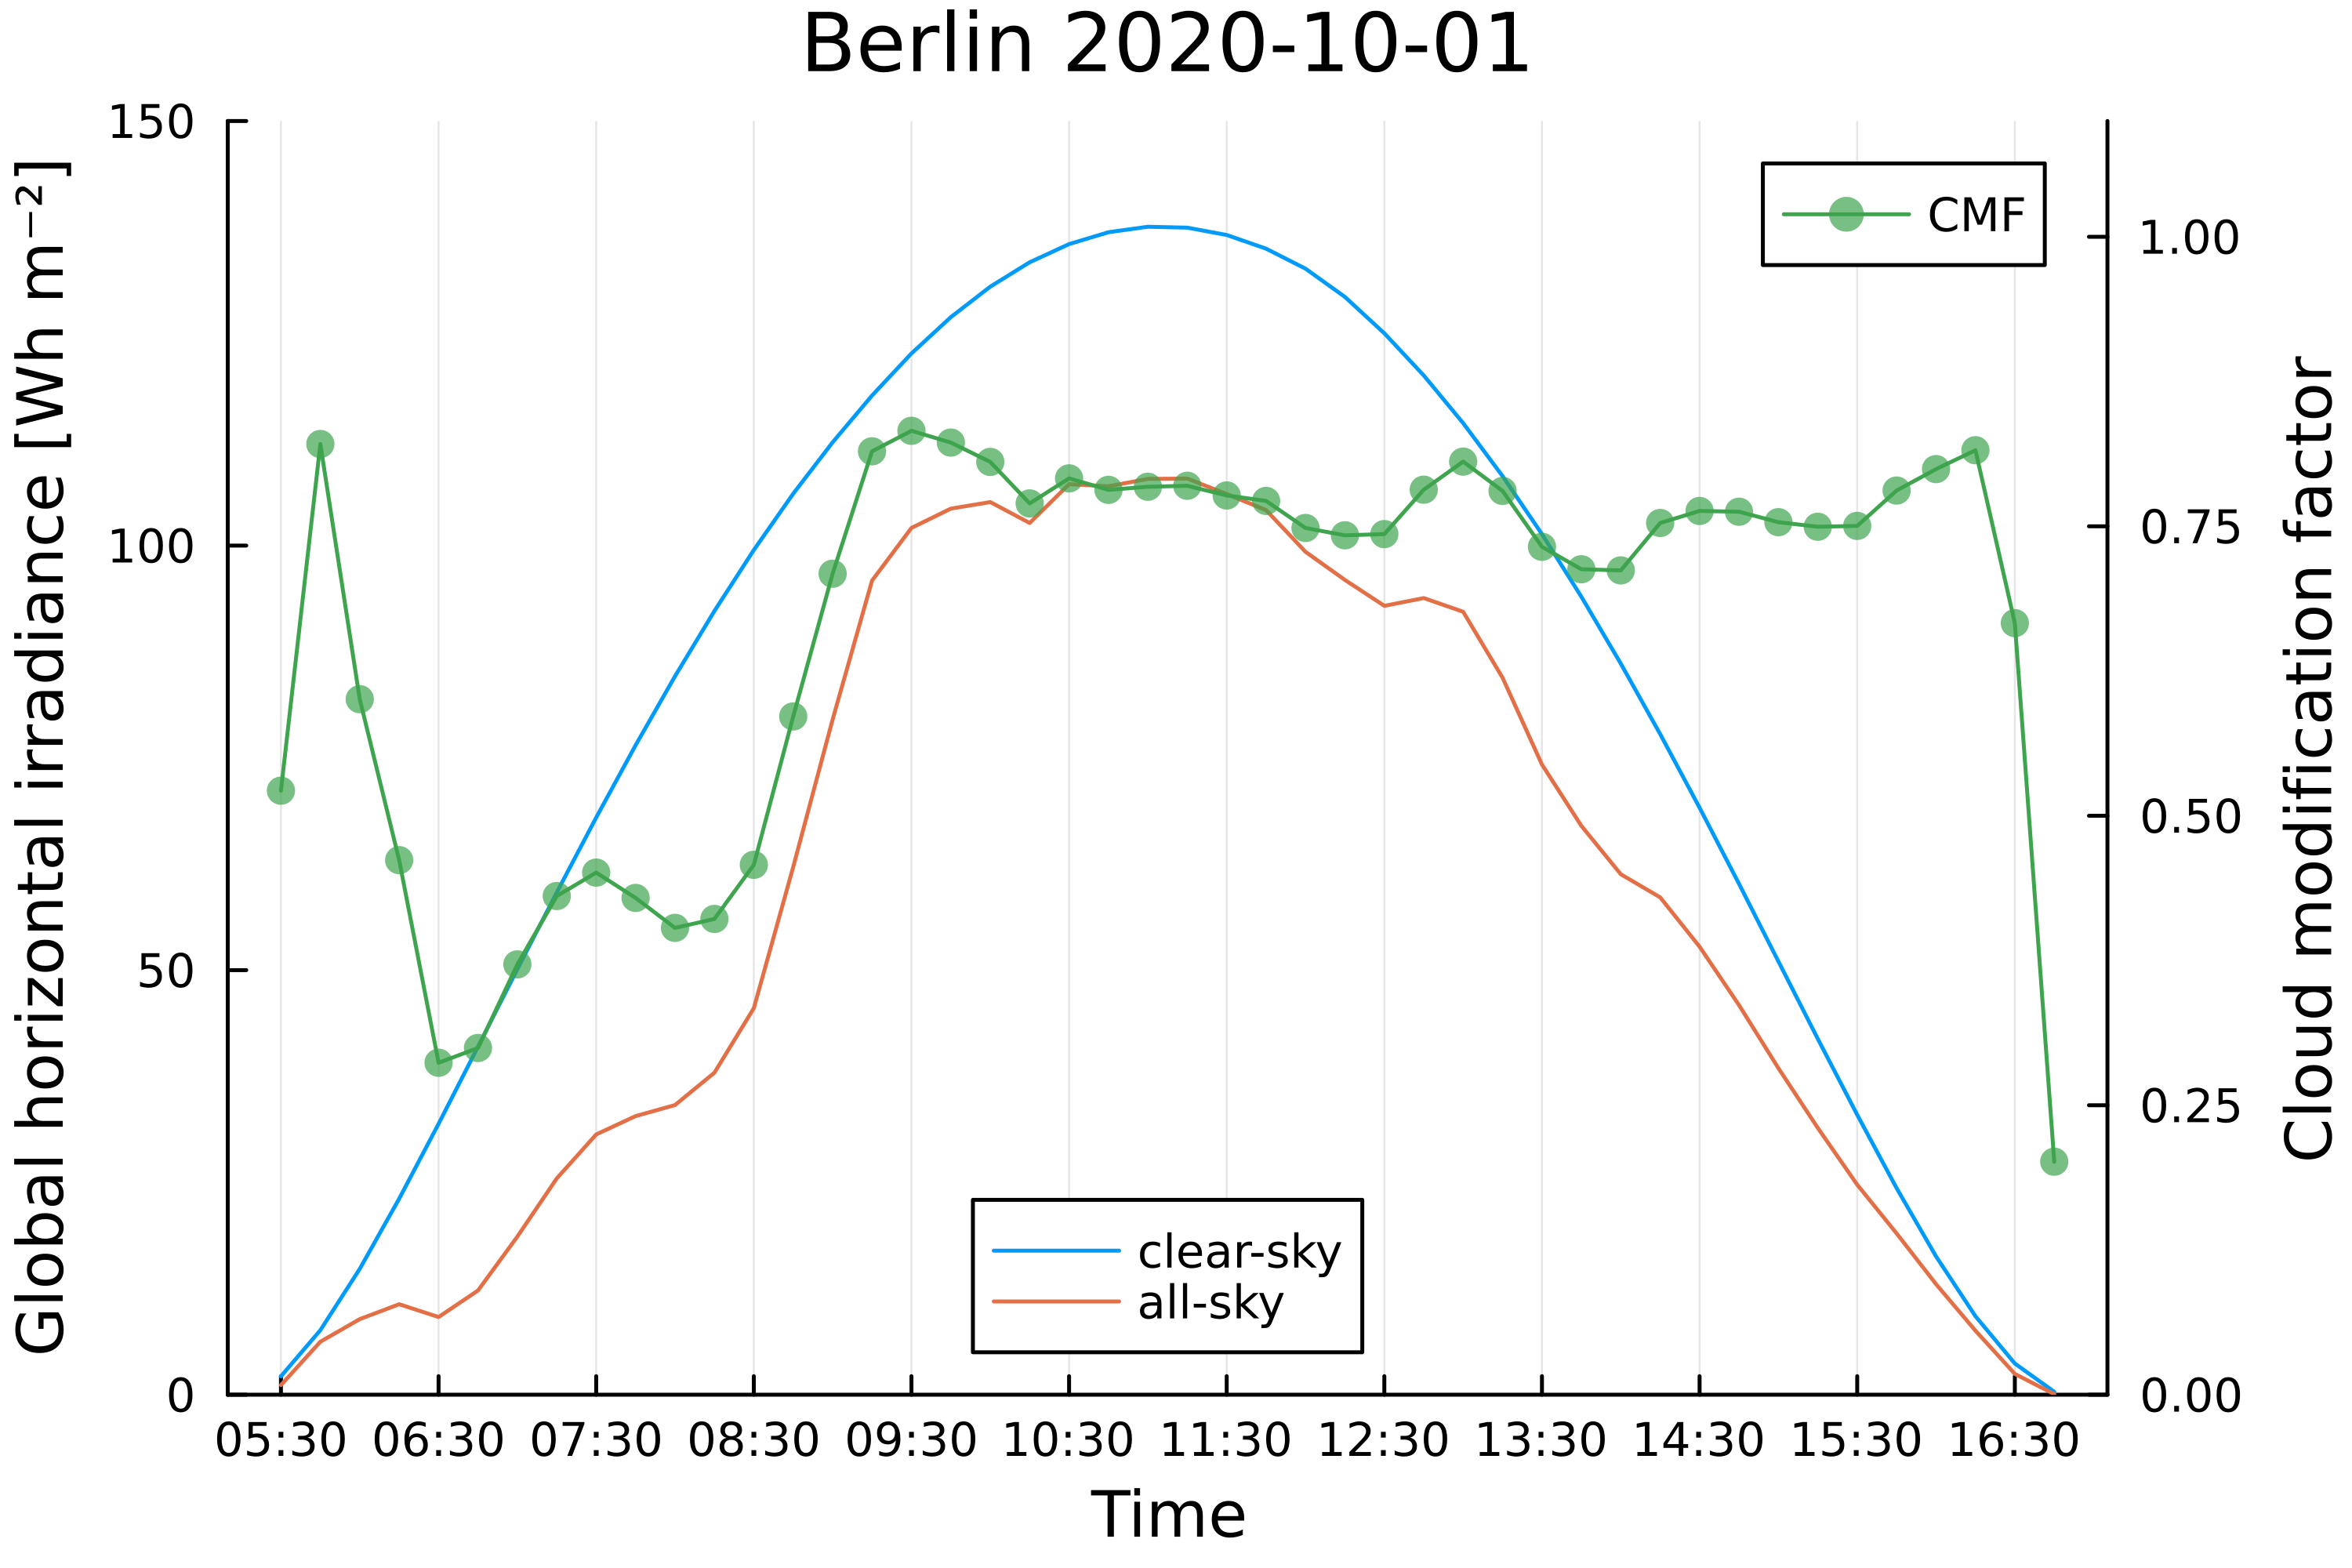

In [16]:
plot!(twinx(), df.dt, df.cmf, c=3, marker=(0.7, stroke(0)), lab="CMF", 
    ylim=(0,1.1), ylabel="Cloud modification factor")

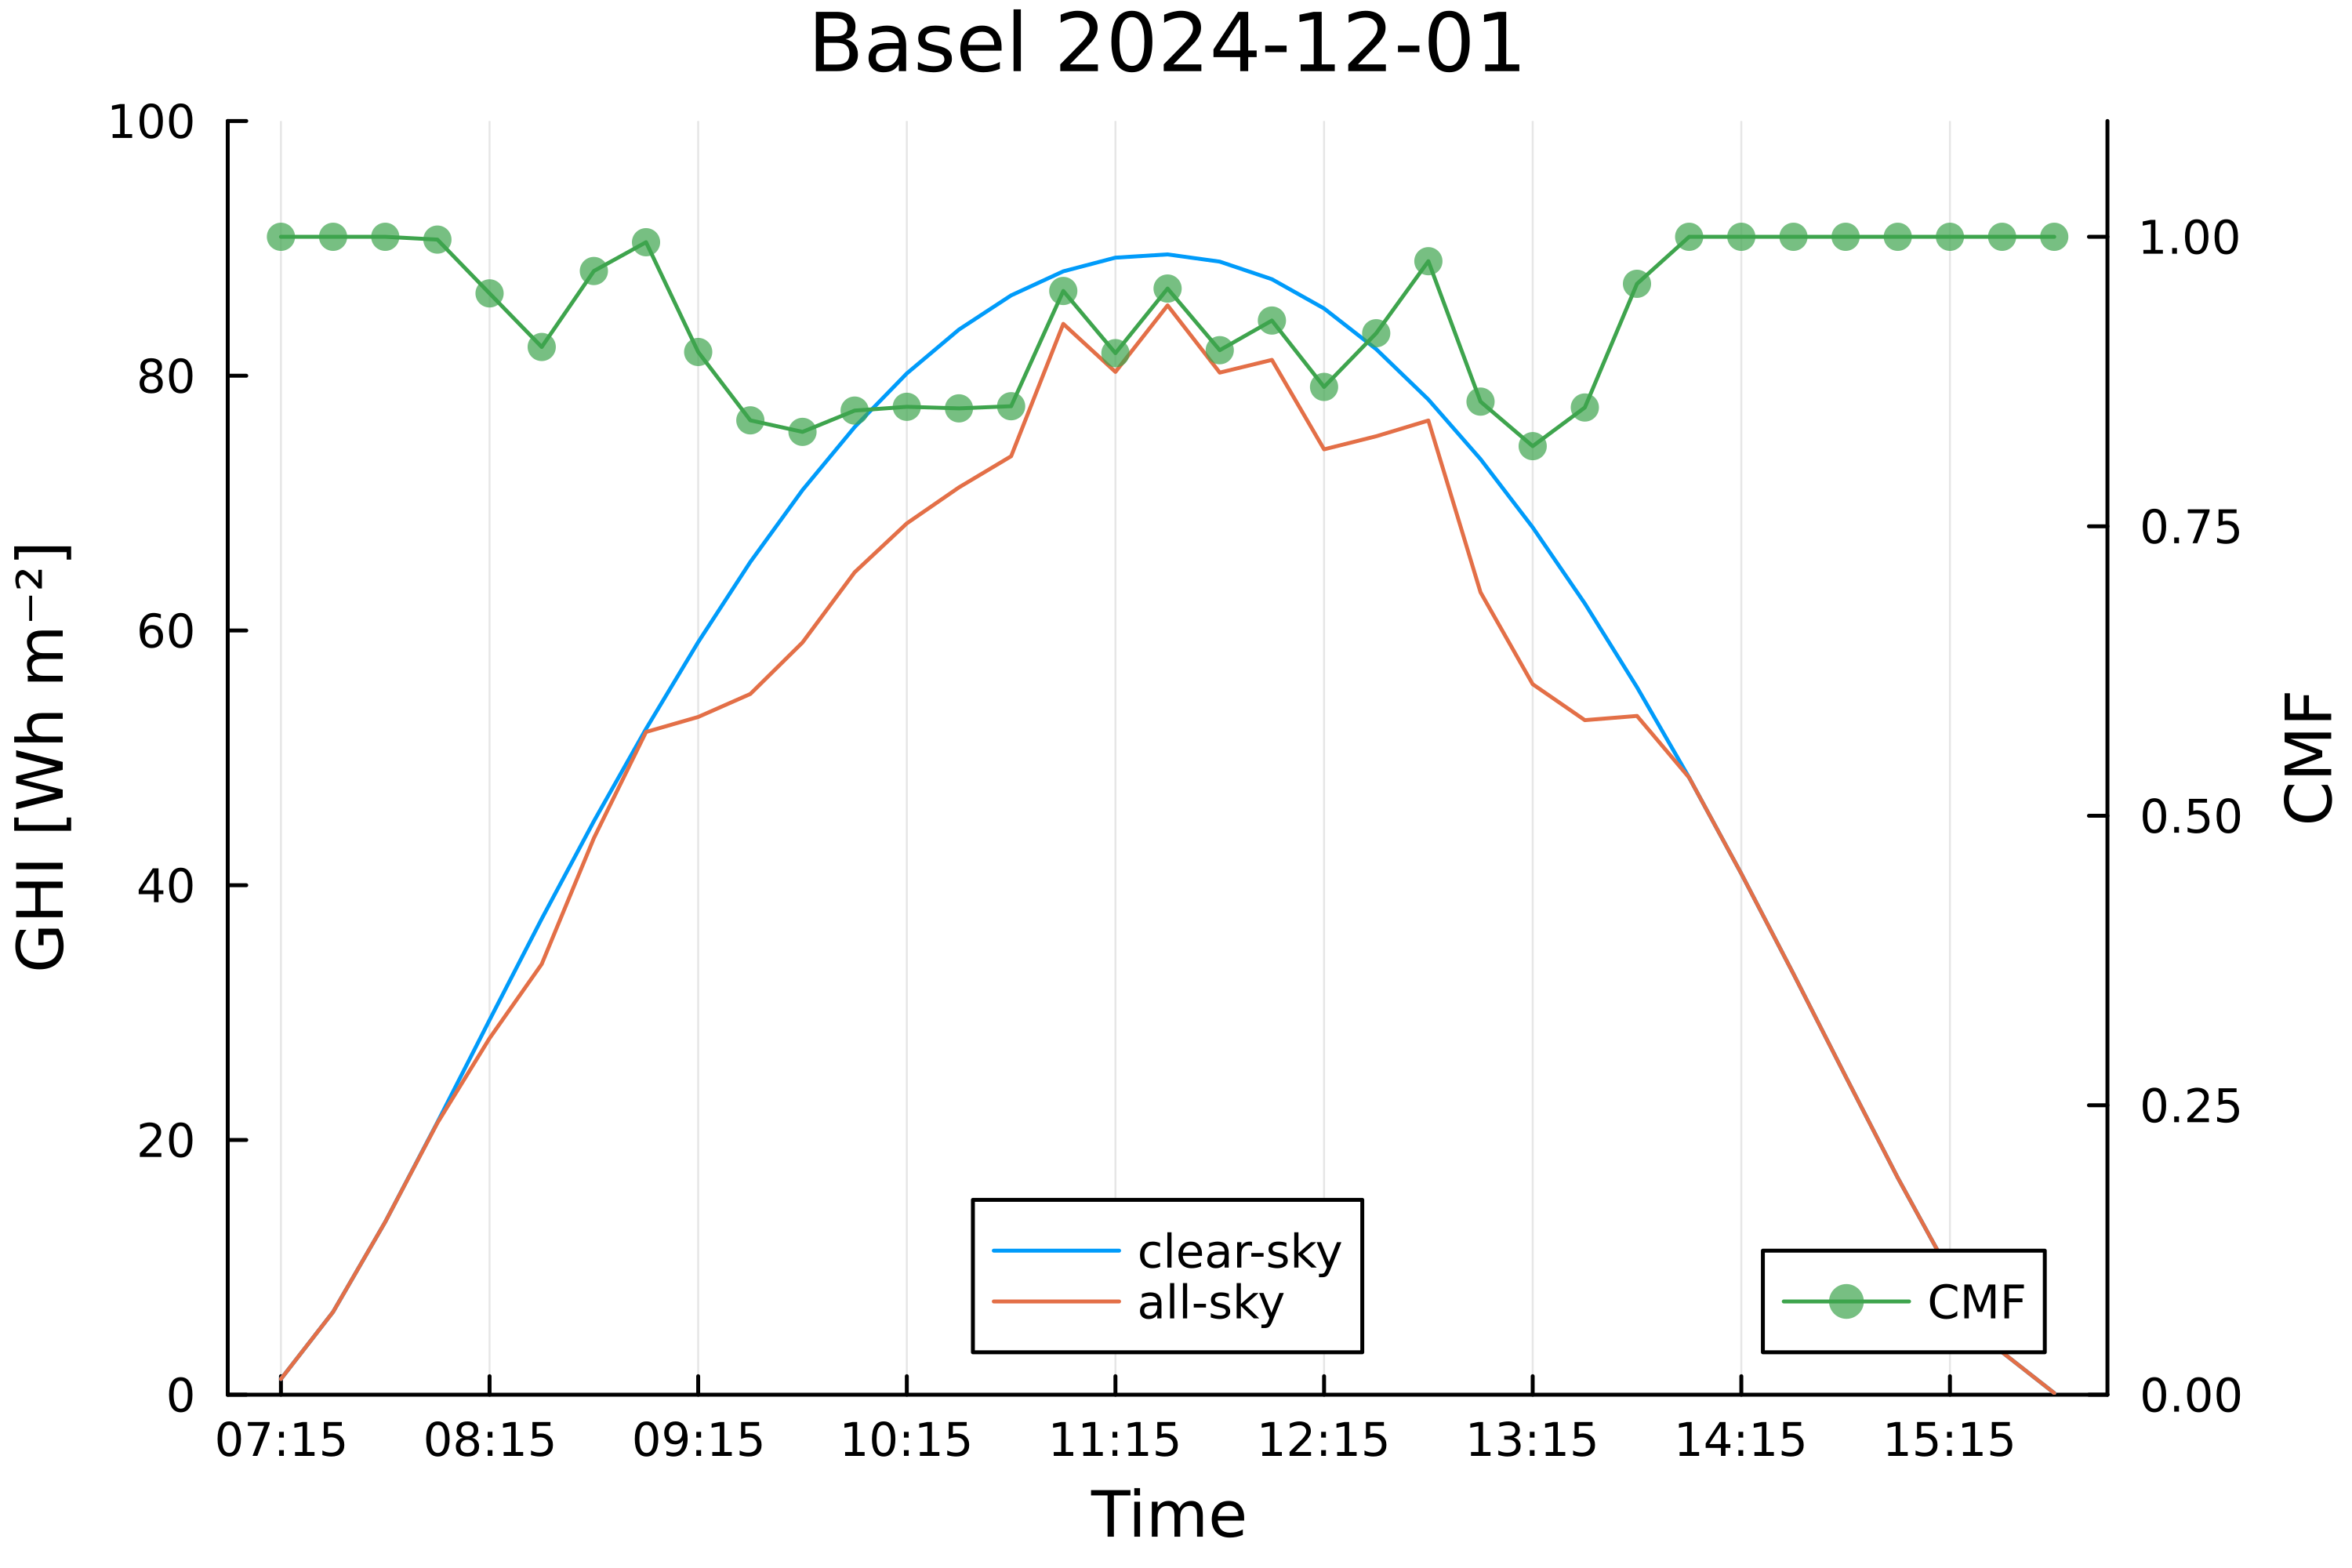

In [11]:
plot!(twinx(), df.dt, df.cmf, c=3, marker=(0.7, stroke(0)), lab="CMF", 
    ylim=(0,1.1), ylabel="CMF")

### Mon mn

In [12]:
gb = groupby(df_b, :mon)
ghi_mo = [mean(g.ghi) for g in gb]
cmf_mo = [mean(g.cmf) for g in gb];

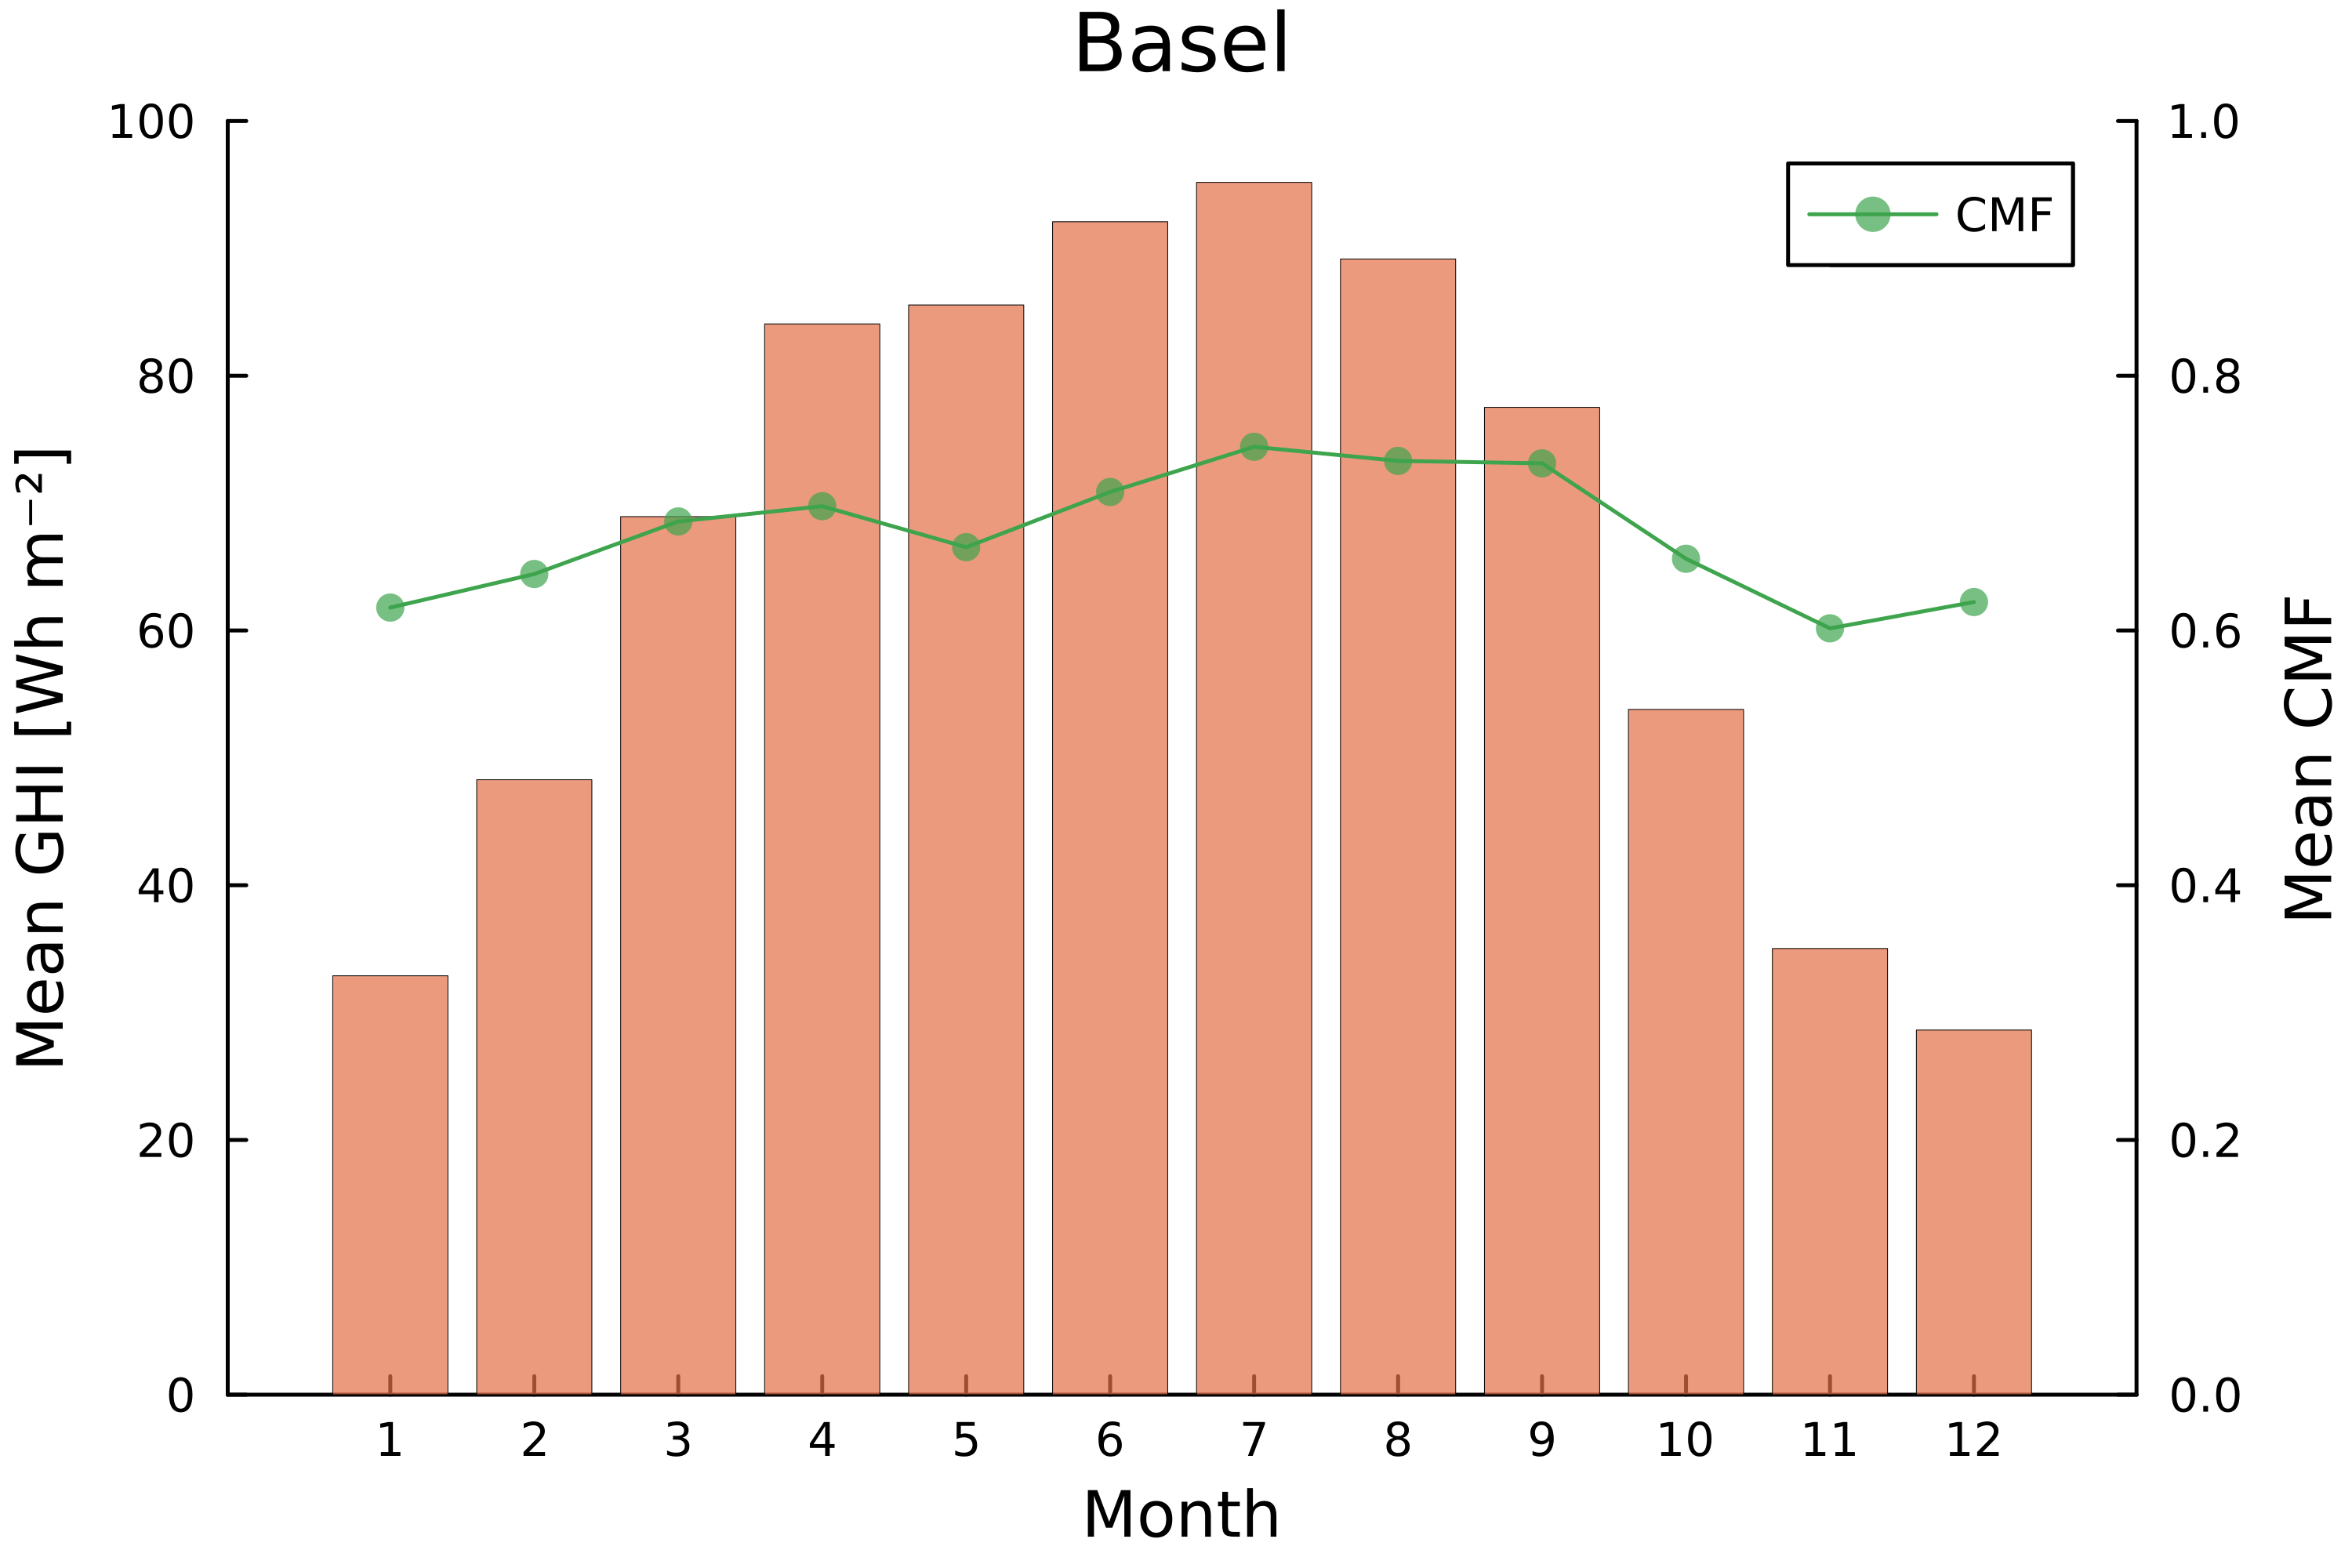

In [14]:
mon_bs = bar(ghi_mo, c=2, lw=0.2, fillalpha=.7, grid=:y,
    xtick=1:12, ylim=(0,100), xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city)
    plot!(twinx(), cmf_mo, c=3, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### split

In [52]:
yrVal = 2023
df_tr, df_val, df_te = splitVal(df_b, yrVal)
df_te

17997×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2024     1     1     7    30   0.289643   0.289643  1.0
     2 │  2024     1     1     7    45   4.19896    4.19896   1.0
     3 │  2024     1     1     8     0  10.8501    10.8501    1.0
     4 │  2024     1     1     8    15  18.5213    18.5213    1.0
     5 │  2024     1     1     8    30  26.3092    26.4952    0.99298
     6 │  2024     1     1     8    45  29.5154    34.3957    0.858116
     7 │  2024     1     1     9     0  32.216     42.0113    0.766841
     8 │  2024     1     1     9    15  35.6509    49.0756    0.72645
     9 │  2024     1     1     9    30  41.9669    55.4921    0.756269
    10 │  2024     1     1     9    45  45.1176    61.3276    0.735682
    11 │  2024     1     1    10     0  60.3731    66.5295    0.907464
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17988 │  2024    12    31    13    30  53.0683    62.9748    0.842691
 17989 │  2024    12    31    13    45  50.1113    56.9427    0.88003
 17990 │  2024    12    31    14     0  48.6099    50.3335    0.965755
 17991 │  2024    12    31    14    15  40.4794    43.2249    0.936483
 17992 │  2024    12    31    14    30  32.5591    35.7197    0.911515
 17993 │  2024    12    31    14    45  27.2007    27.9615    0.972791
 17994 │  2024    12    31    15     0  20.1632    20.1632    1.0
 17995 │  2024    12    31    15    15  12.6783    12.6783    1.0
 17996 │  2024    12    31    15    30   6.02951    6.02951   1.0
 17997 │  2024    12    31    15    45   1.17089    1.17089   1.0
                                                     17976 rows omitted

In [30]:
df_val

17958×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2023     1     1     7    30   0.271946   0.271946  1.0
     2 │  2023     1     1     7    45   3.70175    3.70175   1.0
     3 │  2023     1     1     8     0   9.60592    9.60592   1.0
     4 │  2023     1     1     8    15  16.5511    16.5511    1.0
     5 │  2023     1     1     8    30  23.8805    23.8805    1.0
     6 │  2023     1     1     8    45  31.0006    31.2263    0.992774
     7 │  2023     1     1     9     0  32.9977    38.3652    0.860095
     8 │  2023     1     1     9    15  42.7858    45.1789    0.947033
     9 │  2023     1     1     9    30  51.567     51.567     1.0
    10 │  2023     1     1     9    45  57.4232    57.4232    1.0
    11 │  2023     1     1    10     0  62.6839    62.6839    1.0
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17949 │  2023    12    31    13    30   7.94545   61.7774    0.128614
 17950 │  2023    12    31    13    45   7.11295   56.129     0.126725
 17951 │  2023    12    31    14     0  10.0257    49.8854    0.200975
 17952 │  2023    12    31    14    15   6.14146   43.1083    0.142466
 17953 │  2023    12    31    14    30   5.34131   35.8781    0.148874
 17954 │  2023    12    31    14    45   6.04548   28.307     0.213568
 17955 │  2023    12    31    15     0  15.6009    20.5701    0.758425
 17956 │  2023    12    31    15    15  12.955     12.955     1.0
 17957 │  2023    12    31    15    30   6.0482     6.0482    1.0
 17958 │  2023    12    31    15    45   1.04719    1.04719   1.0
                                                     17937 rows omitted

In [31]:
df_val_w

17958×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2023     1     1     7    30   0.271946   0.271946  1.0
     2 │  2023     1     1     7    45   3.70175    3.70175   1.0
     3 │  2023     1     1     8     0   9.60592    9.60592   1.0
     4 │  2023     1     1     8    15  16.5511    16.5511    1.0
     5 │  2023     1     1     8    30  23.8805    23.8805    1.0
     6 │  2023     1     1     8    45  31.2263    31.2263    1.0
     7 │  2023     1     1     9     0  38.1015    38.3652    0.993127
     8 │  2023     1     1     9    15  39.0661    45.1789    0.8647
     9 │  2023     1     1     9    30  48.8989    51.567     0.948259
    10 │  2023     1     1     9    45  57.4232    57.4232    1.0
    11 │  2023     1     1    10     0  62.6839    62.6839    1.0
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17949 │  2023    12    31    13    30   9.74225   61.7774    0.157699
 17950 │  2023    12    31    13    45   7.20954   56.129     0.128446
 17951 │  2023    12    31    14     0   6.32041   49.8854    0.126699
 17952 │  2023    12    31    14    15   8.65667   43.1083    0.200812
 17953 │  2023    12    31    14    30   5.15377   35.8781    0.143647
 17954 │  2023    12    31    14    45   4.29179   28.307     0.151616
 17955 │  2023    12    31    15     0   4.45564   20.5701    0.216607
 17956 │  2023    12    31    15    15   9.70344   12.955     0.749012
 17957 │  2023    12    31    15    30   6.0482     6.0482    1.0
 17958 │  2023    12    31    15    45   1.04719    1.04719   1.0
                                                     17937 rows omitted

In [53]:
df_val_w, df_te_w = splitVal(df_b_w, yrVal; tr=0)
df_te_w

17997×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2024     1     1     7    30   0.289643   0.289643  1.0
     2 │  2024     1     1     7    45   4.19896    4.19896   1.0
     3 │  2024     1     1     8     0  10.8501    10.8501    1.0
     4 │  2024     1     1     8    15  18.5213    18.5213    1.0
     5 │  2024     1     1     8    30  26.4952    26.4952    1.0
     6 │  2024     1     1     8    45  34.1583    34.3957    0.993099
     7 │  2024     1     1     9     0  36.0207    42.0113    0.857404
     8 │  2024     1     1     9    15  37.6711    49.0756    0.767615
     9 │  2024     1     1     9    30  40.3638    55.4921    0.72738
    10 │  2024     1     1     9    45  46.4757    61.3276    0.757827
    11 │  2024     1     1    10     0  49.1892    66.5295    0.739359
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17988 │  2024    12    31    13    30  55.2685    62.9748    0.877629
 17989 │  2024    12    31    13    45  47.6489    56.9427    0.836788
 17990 │  2024    12    31    14     0  44.0202    50.3335    0.874569
 17991 │  2024    12    31    14    15  41.6635    43.2249    0.963877
 17992 │  2024    12    31    14    30  33.3848    35.7197    0.934634
 17993 │  2024    12    31    14    45  25.479     27.9615    0.911216
 17994 │  2024    12    31    15     0  19.6076    20.1632    0.972444
 17995 │  2024    12    31    15    15  12.6783    12.6783    1.0
 17996 │  2024    12    31    15    30   6.02951    6.02951   1.0
 17997 │  2024    12    31    15    45   1.17089    1.17089   1.0
                                                     17976 rows omitted

In [ ]:
cmf_tr = df_tr.cmf

cmf_tr_cls, binStarts, binMean = getBins(cmf_tr, N; op="el")

In [ ]:
ticks = rd.(binMean, 2)

xti = (binMean[[1:2:18; N]], ticks[[1:2:18; N]]);

#### distri

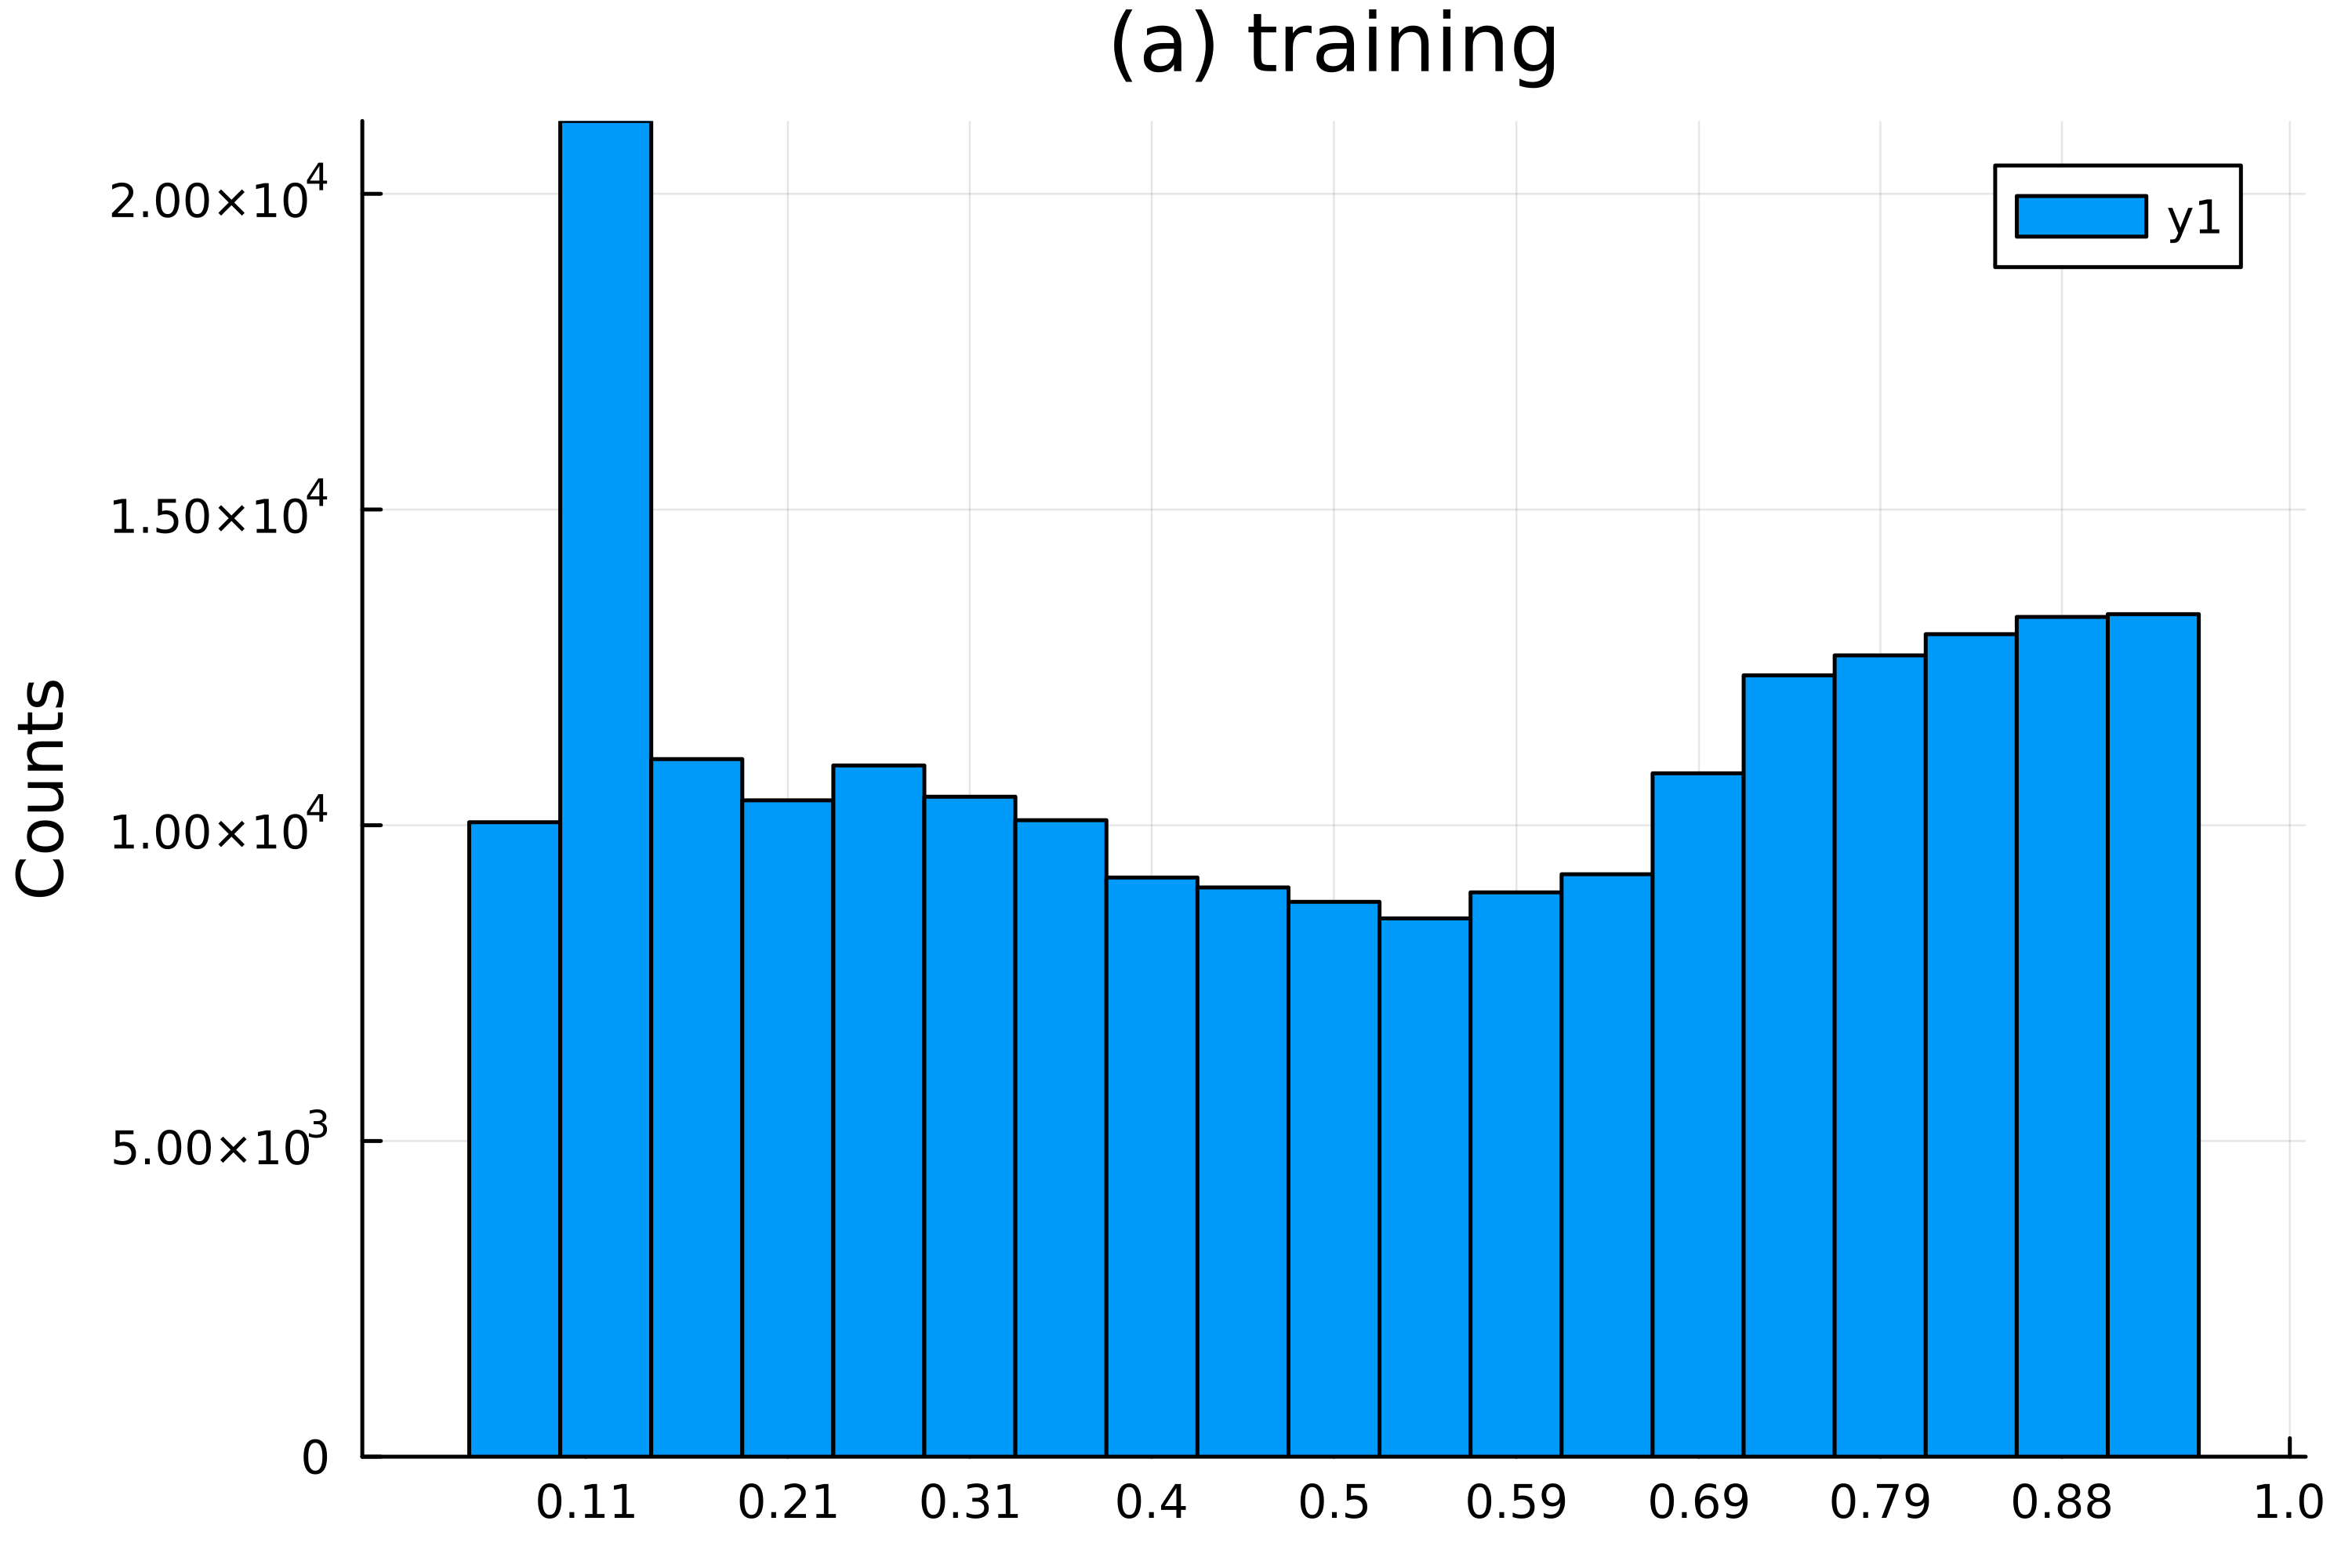

In [26]:
h_train = histogram(cmf_tr, bins=binStarts, xticks=xti, ylabel="Counts",
    title="(a) training")

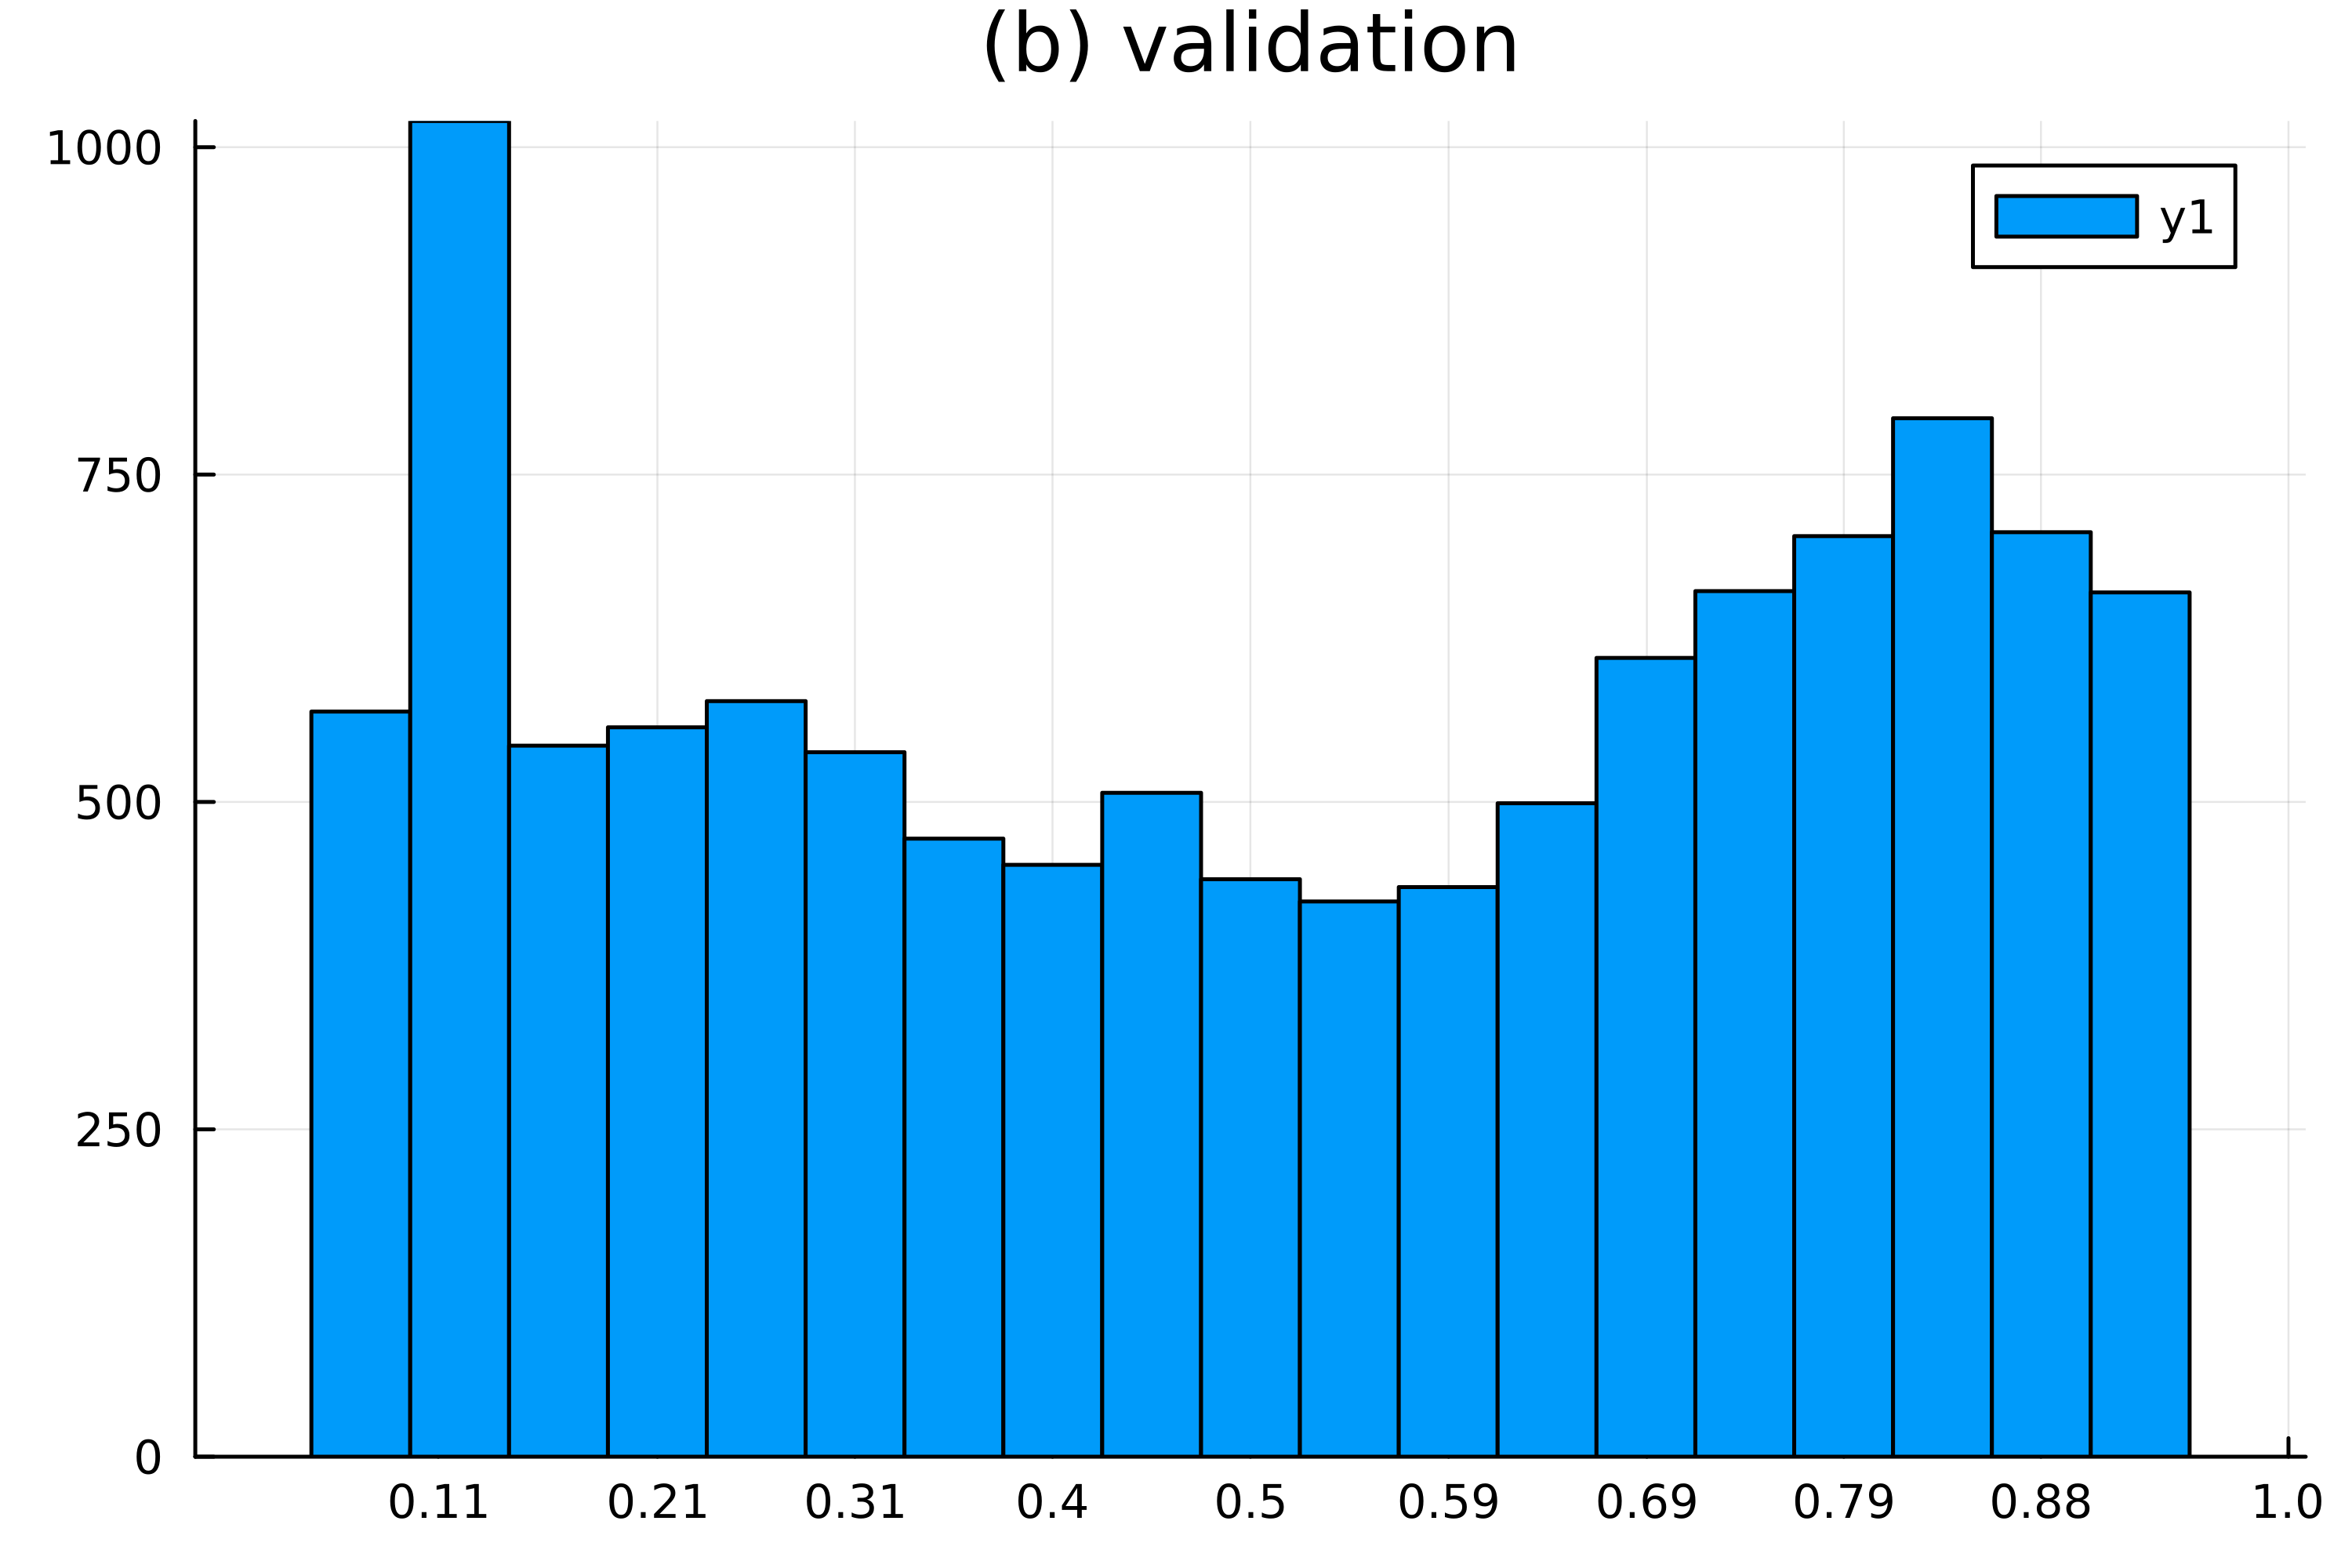

In [27]:
h_val = histogram(df_val.cmf, bins=binStarts, xticks=xti, 
    title="(b) validation")

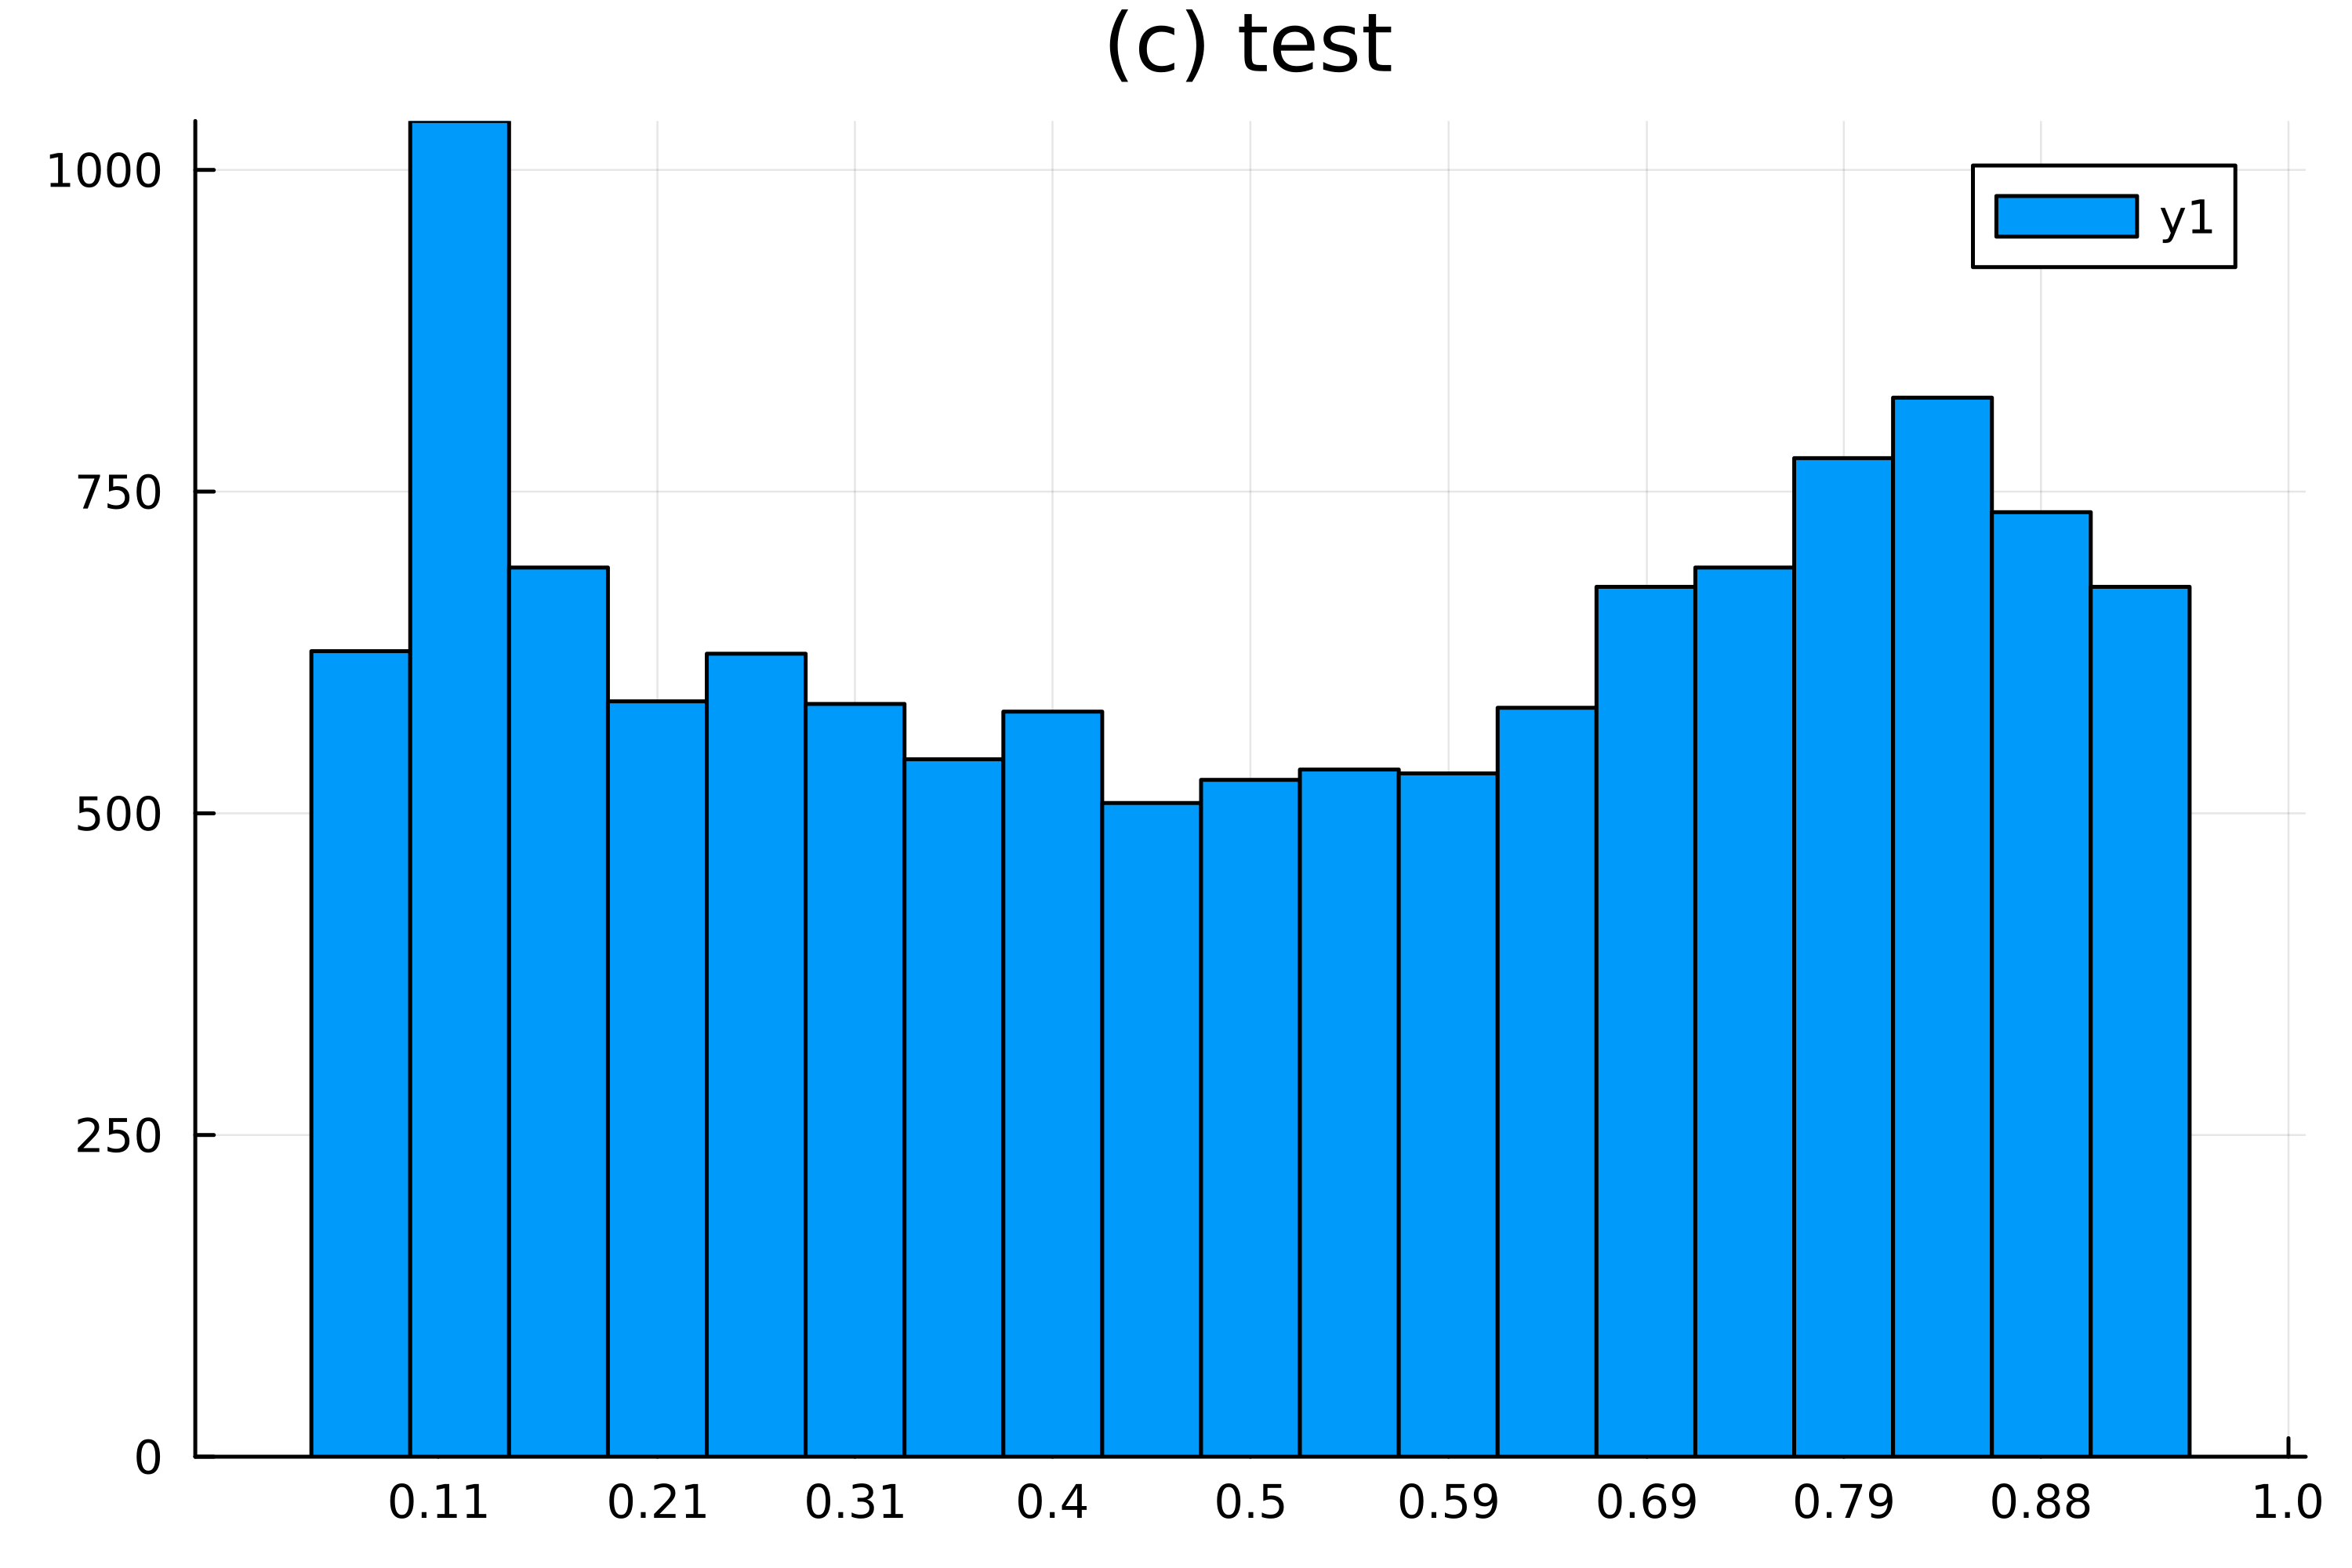

In [28]:
h_test = histogram(df_te.cmf, bins=binStarts, xticks=xti, 
    title="(c) test")

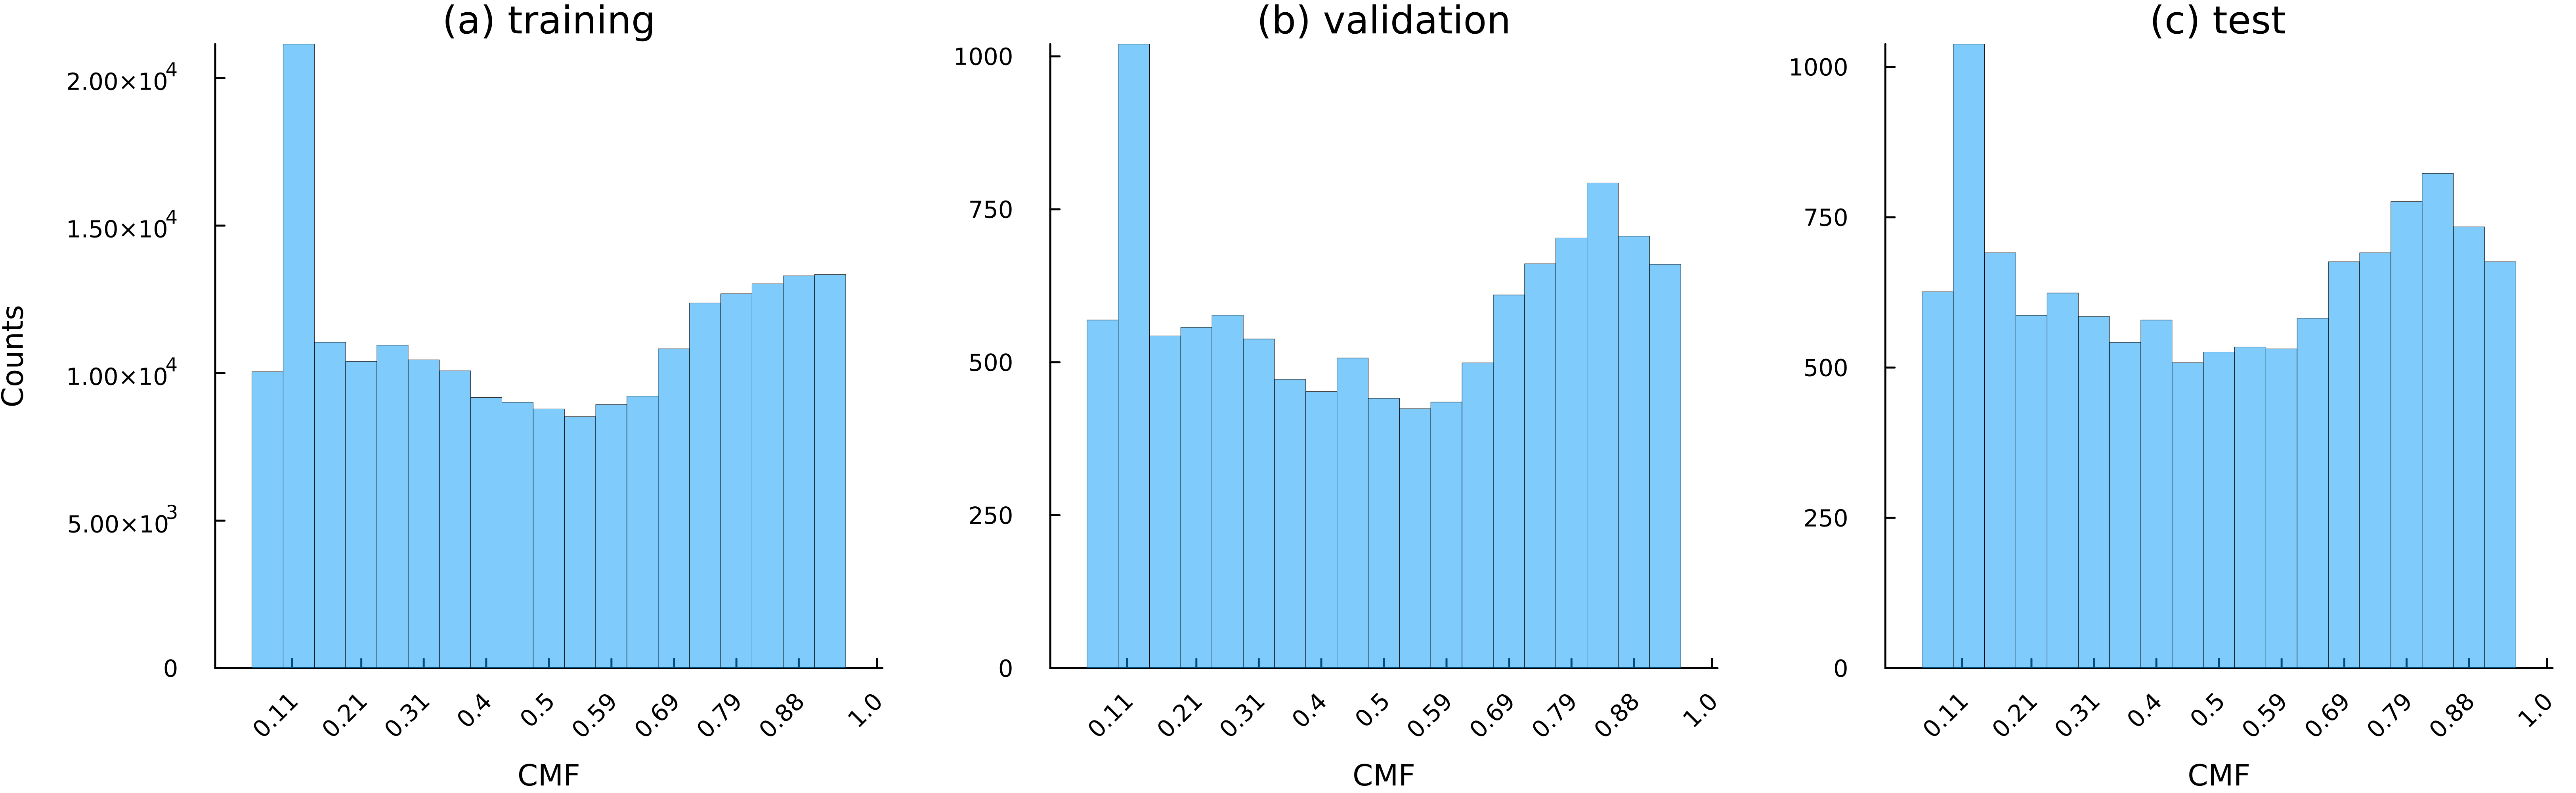

In [29]:
hists = plot(h_train, h_val, h_test, layout=@layout([a b c]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=10, titlefontsize=13, tickfontsize=8, #ylim=(0, ),
    leftmargin=20px, bottommargin=30px, size=(1300,400))

### MC

In [58]:
n = N
od = 2;

In [59]:
function getDF(df0, df_neib, od, steps; n=N) #, d_neib=test_neib_w, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean) # df, 1-d array, 1-d array
    df = df0[(od+steps-1):(end-1), :]
    df.pers = df0.cmf[1:(end-od-steps+1)]
    df = innerjoin(df, df_neib[!, Cols(2:5, 8)], on=[:mon, :day, :hr, :min], matchmissing=:equal, makeunique=true)   
    rename!(df, :cmf_1 => :neib)
    
    T = mcFit(cmf_tr_cls, od, n) # transition matrix
    filter!(:cmf=> c-> !isnan(c), df) # remove nan in central real series 
    pred = mcPredict(df.cmf, od, n, T, binStarts, binMean)   
    df.pred = vcat(ones(od+steps-1) * NaN, pred[1:end-steps])  
    if steps > 1 
        if od == 1
            pred_n = predict_steps_1d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        elseif od == 2
            pred_n = predict_steps_2d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        elseif od == 3
            pred_n = predict_steps_3d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        end
        df.pred_n = vcat(ones(od+steps-1) * NaN, pred_n[1:end-steps], ones(steps) * NaN)
        filter!(:pred_n => p_n -> !isnan(p_n), df)
        df.dif_pred_n = df.pred_n .- df.cmf 
    end    
    filter!([:neib, :pers, :pred] => (n, pe, pr) -> (!isnan(n) & !isnan(pe) & !isnan(pr)), df)
    df.real_cls = classify(df.cmf, binStarts)
    df.dif_pers = df.pers .- df.cmf
    df.dif_pred = df.pred .- df.cmf
    df.dif_neib = df.neib .- df.cmf
    return df
end

getDF (generic function with 3 methods)

In [60]:
steps = 1
df21v = getDF(df_val, df_val_w, od, steps)
df21t = getDF(df_te, df_te_w, od, steps)

17993×15 DataFrame
   Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf       pers      neib      pred      real_cls  dif_pers     dif_pred     dif_neib    
       │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64     
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    15  18.5213   18.5213   1.0       1.0       1.0       0.970449        19   0.0         -0.0295508    0.0
     2 │  2024     1     1     8    30  26.3092   26.4952   0.99298   1.0       1.0       0.970449        19   0.00701987  -0.022531     0.00701987
     3 │  2024     1     1     8    45  29.5154   34.3957   0.858116  0.99298   0.993099  0.970449        17   0.134865     0.112334     0.134984
     4 │  2024     1     1     9     0  32.216    42.0113   0.766841  0.858116  0.857404  0.853951        16   0.0912745    0.0871103    0.0905631
     5 │  2024     1     1     9    15  35.6509   49.0756   0.72645   0.766841  0.767615  0.830484        15   0.0403916    0.104035     0.0411652
     6 │  2024     1     1     9    30  41.9669   55.4921   0.756269  0.72645   0.72738   0.770488        15  -0.0298192    0.0142191   -0.0288885
     7 │  2024     1     1     9    45  45.1176   61.3276   0.735682  0.756269  0.757827  0.781767        15   0.0205869    0.0460851    0.0221452
     8 │  2024     1     1    10     0  60.3731   66.5295   0.907464  0.735682  0.739359  0.781767        19  -0.171782    -0.125697    -0.168105
     9 │  2024     1     1    10    15  49.6876   71.0538   0.699295  0.907464  0.908562  0.924368        14   0.208169     0.225073     0.209267
    10 │  2024     1     1    10    30  22.7735   74.8702   0.304173  0.699295  0.70144   0.664975         6   0.395122     0.360802     0.397267
    11 │  2024     1     1    10    45  37.8958   77.9455   0.486183  0.304173  0.305554  0.320527        10  -0.18201     -0.165656    -0.180629
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17984 │  2024    12    31    13    15  60.3058   68.3695   0.882057  0.994701  0.994526  0.970449        18   0.112644     0.0883921    0.112469
 17985 │  2024    12    31    13    30  53.0683   62.9748   0.842691  0.882057  0.877629  0.921796        17   0.0393663    0.079105     0.0349386
 17986 │  2024    12    31    13    45  50.1113   56.9427   0.88003   0.842691  0.836788  0.877936        18  -0.0373394   -0.00209411  -0.0432421
 17987 │  2024    12    31    14     0  48.6099   50.3335   0.965755  0.88003   0.874569  0.932872        19  -0.0857252   -0.0328835   -0.0911862
 17988 │  2024    12    31    14    15  40.4794   43.2249   0.936483  0.965755  0.963877  0.964368        19   0.0292726    0.0278847    0.0273943
 17989 │  2024    12    31    14    30  32.5591   35.7197   0.911515  0.936483  0.934634  0.970449        19   0.0249682    0.0589345    0.0231188
 17990 │  2024    12    31    14    45  27.2007   27.9615   0.972791  0.911515  0.911216  0.970449        19  -0.0612767   -0.00234218  -0.0615758
 17991 │  2024    12    31    15     0  20.1632   20.1632   1.0       0.972791  0.972444  0.970449        19  -0.0272087   -0.0295508   -0.0275556
 17992 │  2024    12    31    15    15  12.6783   12.6783   1.0       1.0       1.0       0.970449        19   0.0         -0.0295508    0.0
 17993 │  2024    12    31    15    30   6.02951   6.02951  1.0       1.0       1.0       0.970449        19   0.0         -0.0295508    0.0
                                                                                                                                  17972 rows omitted

In [61]:
function hybrid(df_v, dfB, steps) # eval yr, B test yr
    gb = groupby(df_v, :real_cls)
    mae_pers = [meanad(g.pers, g.cmf) for g in gb]
    mae_pred = [meanad(g.pred, g.cmf) for g in gb]
    mae_neib = [meanad(g.neib, g.cmf) for g in gb]
    df1 = DataFrame(:mae_pers=>mae_pers, :mae_pred=>mae_pred, :mae_neib=>mae_neib) 
    if steps > 1
        df1.mae_pred_n = [meanad(g.pred_n, g.cmf) for g in gb]
    end 
    mae_min = Int64[]
    for i in 1:size(df1, 1) 
        row = Array(eachrow(df1)[i])
        id = findfirst(row .== minimum(row))
        push!(mae_min, id)
    end

    if length(mae_min) < 30
        push!(mae_min, mae_min[end])
    end

    dfB.mae_min = Int64[0; mae_min[dfB.real_cls[1:end-1]]]
    dfB.hyb_m = map(eachrow(dfB)) do r
        if r.mae_min ≤ 1
            r.pers
        elseif r.mae_min == 2
            r.neib
        elseif r.mae_min == 3
            r.pred
        else 
            r.pred_n
        end
    end
    rmse_pers = [rmsd(g.pers, g.cmf) for g in gb]
    rmse_pred = [rmsd(g.pred, g.cmf) for g in gb]
    rmse_neib = [rmsd(g.neib, g.cmf) for g in gb]
    df2 = DataFrame(:rmse_pers=>rmse_pers, :rmse_pred=>rmse_pred, :rmse_neib=>rmse_neib)
    if steps > 1
        df2.rmse_pred_n = [rmsd(g.pred_n, g.cmf) for g in gb]
    end
    rmse_min = Int64[]
    for i in 1:size(df2, 1) 
        row = Array(eachrow(df2)[i])
        id = findfirst(row .== minimum(row))
        push!(rmse_min, id)
    end
    if length(rmse_min) < 30
        push!(rmse_min, rmse_min[end])
    end
    dfB.rmse_min = Int64[0; rmse_min[dfB.real_cls[1:end-1]]]
    dfB.hyb_r = map(eachrow(dfB)) do r
        if r.rmse_min ≤ 1
            r.pers
        elseif r.rmse_min == 2
            r.neib
        elseif r.rmse_min == 3
            r.pred
        else
            r.pred_n
        end
    end
    dfB.dif_hyb_m = dfB.hyb_m .- dfB.cmf
    dfB.dif_hyb_r = dfB.hyb_r .- dfB.cmf
    return dfB
end

hybrid (generic function with 1 method)

In [62]:
df1t = hybrid(df21v, df21t, steps)

17993×21 DataFrame
   Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf       pers      neib      pred      real_cls  dif_pers     dif_pred     dif_neib     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m  ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64      Int64    Float64   Int64     Float64   Float64    ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    15  18.5213   18.5213   1.0       1.0       1.0       0.970449        19   0.0         -0.0295508    0.0               0  1.0              0  1.0        0.0       ⋯
     2 │  2024     1     1     8    30  26.3092   26.4952   0.99298   1.0       1.0       0.970449        19   0.00701987  -0.022531     0.00701987        3  0.970449         3  0.970449  -0.022531
     3 │  2024     1     1     8    45  29.5154   34.3957   0.858116  0.99298   0.993099  0.970449        17   0.134865     0.112334     0.134984          3  0.970449         3  0.970449   0.112334
     4 │  2024     1     1     9     0  32.216    42.0113   0.766841  0.858116  0.857404  0.853951        16   0.0912745    0.0871103    0.0905631         3  0.853951         3  0.853951   0.0871103
     5 │  2024     1     1     9    15  35.6509   49.0756   0.72645   0.766841  0.767615  0.830484        15   0.0403916    0.104035     0.0411652         3  0.830484         2  0.767615   0.104035  ⋯
     6 │  2024     1     1     9    30  41.9669   55.4921   0.756269  0.72645   0.72738   0.770488        15  -0.0298192    0.0142191   -0.0288885         3  0.770488         2  0.72738    0.0142191
     7 │  2024     1     1     9    45  45.1176   61.3276   0.735682  0.756269  0.757827  0.781767        15   0.0205869    0.0460851    0.0221452         3  0.781767         2  0.757827   0.0460851
     8 │  2024     1     1    10     0  60.3731   66.5295   0.907464  0.735682  0.739359  0.781767        19  -0.171782    -0.125697    -0.168105          3  0.781767         2  0.739359  -0.125697
     9 │  2024     1     1    10    15  49.6876   71.0538   0.699295  0.907464  0.908562  0.924368        14   0.208169     0.225073     0.209267          3  0.924368         3  0.924368   0.225073  ⋯
    10 │  2024     1     1    10    30  22.7735   74.8702   0.304173  0.699295  0.70144   0.664975         6   0.395122     0.360802     0.397267          3  0.664975         3  0.664975   0.360802
    11 │  2024     1     1    10    45  37.8958   77.9455   0.486183  0.304173  0.305554  0.320527        10  -0.18201     -0.165656    -0.180629          3  0.320527         3  0.320527  -0.165656
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮     ⋱
 17984 │  2024    12    31    13    15  60.3058   68.3695   0.882057  0.994701  0.994526  0.970449        18   0.112644     0.0883921    0.112469          3  0.970449         3  0.970449   0.0883921
 17985 │  2024    12    31    13    30  53.0683   62.9748   0.842691  0.882057  0.877629  0.921796        17   0.0393663    0.079105     0.0349386         2  0.877629         2  0.877629   0.0349386 ⋯
 17986 │  2024    12    31    13    45  50.1113   56.9427   0.88003   0.842691  0.836788  0.877936        18  -0.0373394   -0.00209411  -0.0432421         3  0.877936         3  0.877936  -0.0020941
 17987 │  2024    12    31    14     0  48.6099   50.3335   0.965755  0.88003   0.874569  0.932872        19  -0.0857252   -0.0328835   -0.0911862         2  0.874569         2  0.874569  -0.0911862
 17988 │  2024    12    31    14    15  40.4794   43.2249   0.936483  0.965755  0.963877  0.964368        19   0.0292726    0.0278847    0.0273943         3  0.964368         3  0.964368   

In [63]:
steps = 2
df22v = getDF(df_val, df_val_w, od, steps)
df22t = getDF(df_te, df_te_w, od, steps)
df2t = hybrid(df22v, df22t, steps)

17989×23 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      neib      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     dif_neib     mae_min  hyb_m     rmse_min  ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Float64      Int64    Float64   Int64     ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    45  29.5154  34.3957  0.858116  1.0       0.993099  0.970449  0.970449   0.112334          17   0.141884     0.112334     0.134984          0  1.0              0  ⋯
     2 │  2024     1     1     9     0  32.216   42.0113  0.766841  0.99298   0.857404  0.970449  0.970449   0.203608          16   0.226139     0.203608     0.0905631         3  0.970449         3
     3 │  2024     1     1     9    15  35.6509  49.0756  0.72645   0.858116  0.767615  0.853951  0.885863   0.159414          15   0.131666     0.127502     0.0411652         3  0.853951         3
     4 │  2024     1     1     9    30  41.9669  55.4921  0.756269  0.766841  0.72738   0.830484  0.902582   0.146313          15   0.0105724    0.0742153   -0.0288885         3  0.830484         3
     5 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.72645   0.757827  0.770488  0.85567    0.119988          15  -0.00923235   0.0348059    0.0221452         3  0.770488         3  ⋯
     6 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.756269  0.739359  0.781767  0.85567   -0.0517938         19  -0.151195    -0.125697    -0.168105          3  0.781767         3
     7 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.735682  0.908562  0.781767  0.85567    0.156375          14   0.0363867    0.0824718    0.209267          3  0.781767         3
     8 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.907464  0.70144   0.924368  0.970449   0.666276           6   0.603291     0.620195     0.397267          3  0.924368         3
     9 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.699295  0.305554  0.664975  0.658896   0.172713          10   0.213112     0.178792    -0.180629          3  0.664975         3  ⋯
    10 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.304173  0.487044  0.320527  0.375245  -0.317129          14  -0.3882      -0.371846    -0.205329          3  0.320527         3
    11 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.486183  0.69362   0.596221  0.669643  -0.112587          16  -0.296047    -0.186009    -0.0886104         3  0.596221         3
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮            ⋮          ⋮        ⋮         ⋮      ⋱
 17980 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.961098  1.0       0.964368  0.970449  -0.0295508         19  -0.0389025   -0.0356324    0.0               3  0.964368         3
 17981 │  2024    12    31    13     0  72.6913  73.0785  0.994701  1.0       1.0       0.970449  0.970449  -0.024252          19   0.00529882  -0.024252     0.00529882        3  0.970449         3  ⋯
 17982 │  2024    12    31    13    15  60.3058  68.3695  0.882057  1.0       0.994526  0.970449  0.970449   0.0883921         18   0.117943     0.0883921    0.112469          3  0.970449         3
 17983 │  2024    12    31    13    30  53.0683  62.9748  0.842691  0.994701  0.877629  0.970449  0.970449   0.127758          17   0.15201      0.127758     0.0349386         3  0.970449         3
 17984 │  2024    12    31    13    45  50.1113  56.9427  0.88003   0.882057  0.836788  0.921796  0.964368   0.0843374         18   0.00202693   0.0417656   -0.0432421         3  0.921796        

In [64]:
steps = 3
df23v = getDF(df_val, df_val_w, od, steps)
df23t = getDF(df_te, df_te_w, od, steps)
df3t = hybrid(df23v, df23t, steps)

17986×23 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      neib      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     dif_neib      mae_min  hyb_m     rmse_min ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Float64       Int64    Float64   Int64    ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     9    15  35.6509  49.0756  0.72645   0.99298   0.767615  0.970449  0.970449   0.244             15   0.266531     0.244        0.0411652          0  0.99298          0 ⋯
     2 │  2024     1     1     9    30  41.9669  55.4921  0.756269  0.858116  0.72738   0.853951  0.932872   0.176603          15   0.101847     0.0976826   -0.0288885          3  0.853951         3
     3 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.766841  0.757827  0.830484  0.932872   0.19719           15   0.0311592    0.0948022    0.0221452          3  0.830484         3
     4 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.72645   0.739359  0.770488  0.902582  -0.00488212        19  -0.181015    -0.136976    -0.168105           3  0.770488         3
     5 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.756269  0.908562  0.781767  0.902582   0.203287          14   0.0569735    0.0824718    0.209267           3  0.781767         3 ⋯
     6 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.735682  0.70144   0.781767  0.902582   0.598409           6   0.431509     0.477594     0.397267           3  0.781767         3
     7 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.907464  0.305554  0.924368  0.970449   0.484266          10   0.421281     0.438185    -0.180629           3  0.924368         3
     8 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.699295  0.487044  0.664975  0.679111  -0.0132627         14   0.00692194  -0.0273981   -0.205329           3  0.664975         3
     9 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.304173  0.69362   0.320527  0.439717  -0.342513          16  -0.478057    -0.461703    -0.0886104          3  0.320527         3 ⋯
    10 │  2024     1     1    11    30  66.6129  82.5062  0.807368  0.486183  0.783053  0.596221  0.764413  -0.0429546         16  -0.321185    -0.211147    -0.0243151          3  0.596221         3
    11 │  2024     1     1    11    45  65.3477  82.4349  0.792718  0.692373  0.807522  0.78479   0.929867   0.137149          16  -0.100345    -0.0079279    0.0148037          3  0.78479          3
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮            ⋮           ⋮        ⋮         ⋮     ⋱
 17977 │  2024    12    31    12    30  80.2944  80.2944  1.0       0.946489  0.960439  0.964387  0.970449  -0.0295508         19  -0.0535106   -0.0356129   -0.0395607          3  0.964387         3
 17978 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.903169  1.0       0.921796  0.970449  -0.0295508         19  -0.0968314   -0.0782043    0.0                3  0.921796         3 ⋯
 17979 │  2024    12    31    13     0  72.6913  73.0785  0.994701  0.961098  1.0       0.964368  0.970449  -0.024252          19  -0.0336037   -0.0303336    0.00529882         3  0.964368         3
 17980 │  2024    12    31    13    15  60.3058  68.3695  0.882057  1.0       0.994526  0.970449  0.970449   0.0883921         18   0.117943     0.0883921    0.112469           3  0.970449         3
 17981 │  2024    12    31    13    30  53.0683  62.9748  0.842691  1.0       0.877629  0.970449  0.970449   0.127758          17   0.157309     0.127758     0.0349386          3  0.97

In [65]:
steps = 4
df24v = getDF(df_val, df_val_w, od, steps)
df24t = getDF(df_te, df_te_w, od, steps)
df4t = hybrid(df24v, df24t, steps)

17983×23 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      neib      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     dif_neib      mae_min  hyb_m     rmse_min ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Float64       Int64    Float64   Int64    ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.858116  0.757827  0.853951  0.964368   0.228686          15   0.122434     0.118269     0.0221452          0  0.858116         0 ⋯
     2 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.766841  0.739359  0.830484  0.964368   0.0569034         19  -0.140623    -0.0769801   -0.168105           3  0.830484         3
     3 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.72645   0.908562  0.770488  0.932872   0.233577          14   0.0271543    0.0711926    0.209267           3  0.770488         3
     4 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.756269  0.70144   0.781767  0.932872   0.628699           6   0.452096     0.477594     0.397267           3  0.781767         3
     5 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.735682  0.305554  0.781767  0.932872   0.446689          10   0.249499     0.295584    -0.180629           3  0.781767         3 ⋯
     6 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.907464  0.487044  0.924368  0.970449   0.278076          14   0.215091     0.231994    -0.205329           3  0.924368         3
     7 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.699295  0.69362   0.664975  0.757157  -0.0250731         16  -0.082935    -0.117255    -0.0886104          3  0.664975         3
     8 │  2024     1     1    11    30  66.6129  82.5062  0.807368  0.304173  0.783053  0.320527  0.549276  -0.258092          16  -0.503195    -0.48684     -0.0243151          3  0.320527         3
     9 │  2024     1     1    11    45  65.3477  82.4349  0.792718  0.486183  0.807522  0.596221  0.864454   0.0717358         16  -0.306535    -0.196497     0.0148037          3  0.596221         3 ⋯
    10 │  2024     1     1    12     0  76.5056  81.5665  0.937954  0.692373  0.792161  0.78479   0.964368   0.0264137         19  -0.245581    -0.153164    -0.145793           3  0.78479          3
    11 │  2024     1     1    12    15  79.5249  80.0874  0.992977  0.78223   0.937648  0.864454  0.970449  -0.0225278         19  -0.210747    -0.128523    -0.0553294          3  0.864454         3
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮            ⋮           ⋮        ⋮         ⋮     ⋱
 17974 │  2024    12    31    12    15  79.5366  82.756   0.961098  0.827709  0.901896  0.877936  0.970449   0.00935164        19  -0.133389    -0.0831615   -0.0592013          3  0.877936         4
 17975 │  2024    12    31    12    30  80.2944  80.2944  1.0       0.829721  0.960439  0.885863  0.970449  -0.0295508         19  -0.170279    -0.114137    -0.0395607          3  0.885863         3 ⋯
 17976 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.946489  1.0       0.964387  0.970449  -0.0295508         19  -0.0535106   -0.0356129    0.0                3  0.964387         3
 17977 │  2024    12    31    13     0  72.6913  73.0785  0.994701  0.903169  1.0       0.921796  0.970449  -0.024252          19  -0.0915326   -0.0729054    0.00529882         3  0.921796         3
 17978 │  2024    12    31    13    15  60.3058  68.3695  0.882057  0.961098  0.994526  0.964368  0.970449   0.0883921         18   0.0790404    0.0823105    0.112469           3  0.96

### std dev

In [66]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std))

col_ = combine(df2t, :dif_pred_n => std => :mc_b)
append!(col_, combine(df3t, :dif_pred_n => std => :mc_b))
append!(col_, combine(df4t, :dif_pred_n => std => :mc_b))
col_n = reshape([NaN; Array(col_)], 4)
insertcols!(sds, 3, :mc_b => col_n)

4×6 DataFrame
 Row │ pers      neib      mc_b        pred      hyb_m     hyb_r    
     │ Float64   Float64   Float64     Float64   Float64   Float64  
─────┼──────────────────────────────────────────────────────────────
   1 │ 0.126195  0.101853  NaN         0.12546   0.125853  0.124255
   2 │ 0.189012  0.101864    0.185794  0.183218  0.183219  0.183219
   3 │ 0.227305  0.101865    0.221081  0.218525  0.218526  0.218526
   4 │ 0.25431   0.101872    0.245953  0.243606  0.243606  0.241511

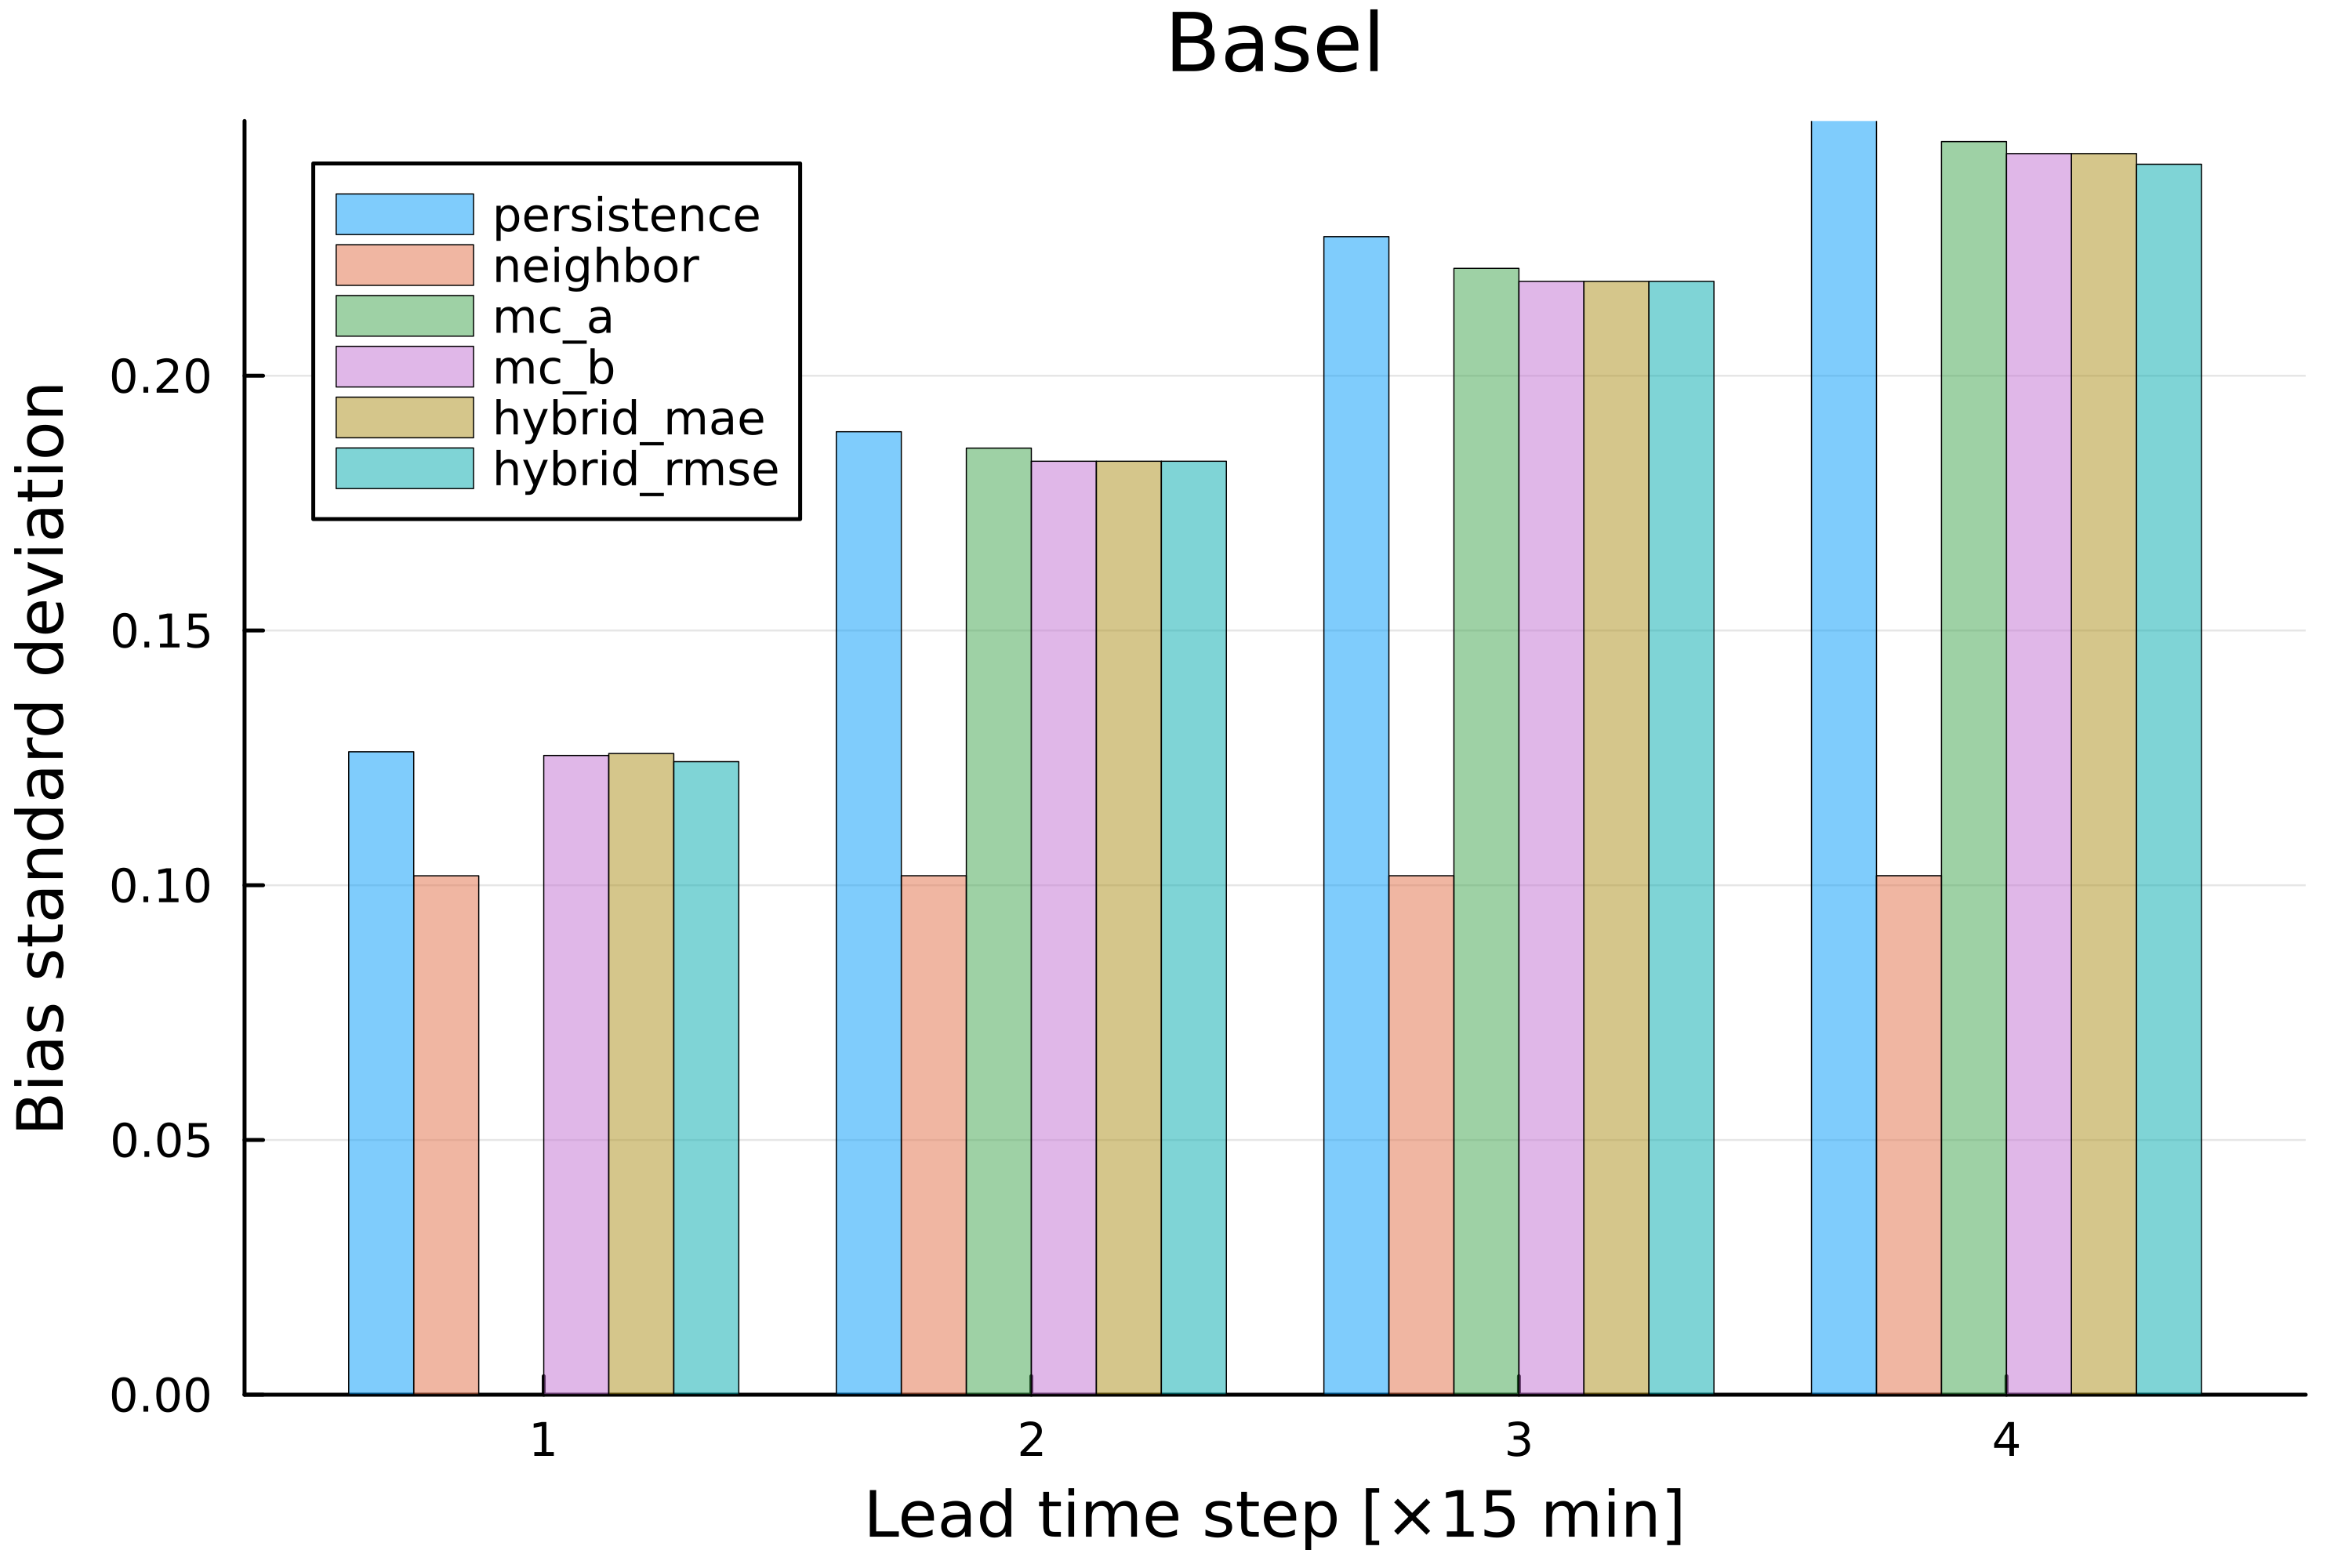

In [67]:
gb_b = groupedbar(Matrix(sds), leg=:topleft, 
    label=["persistence" "neighbor" "mc_a" "mc_b" "hybrid_mae" "hybrid_rmse"],
    # c=[4 5 1 7 "black" "red"], 
    lw=0.3, fillalpha=0.5, grid=:y, ylim=(0, 0.25),
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=city)

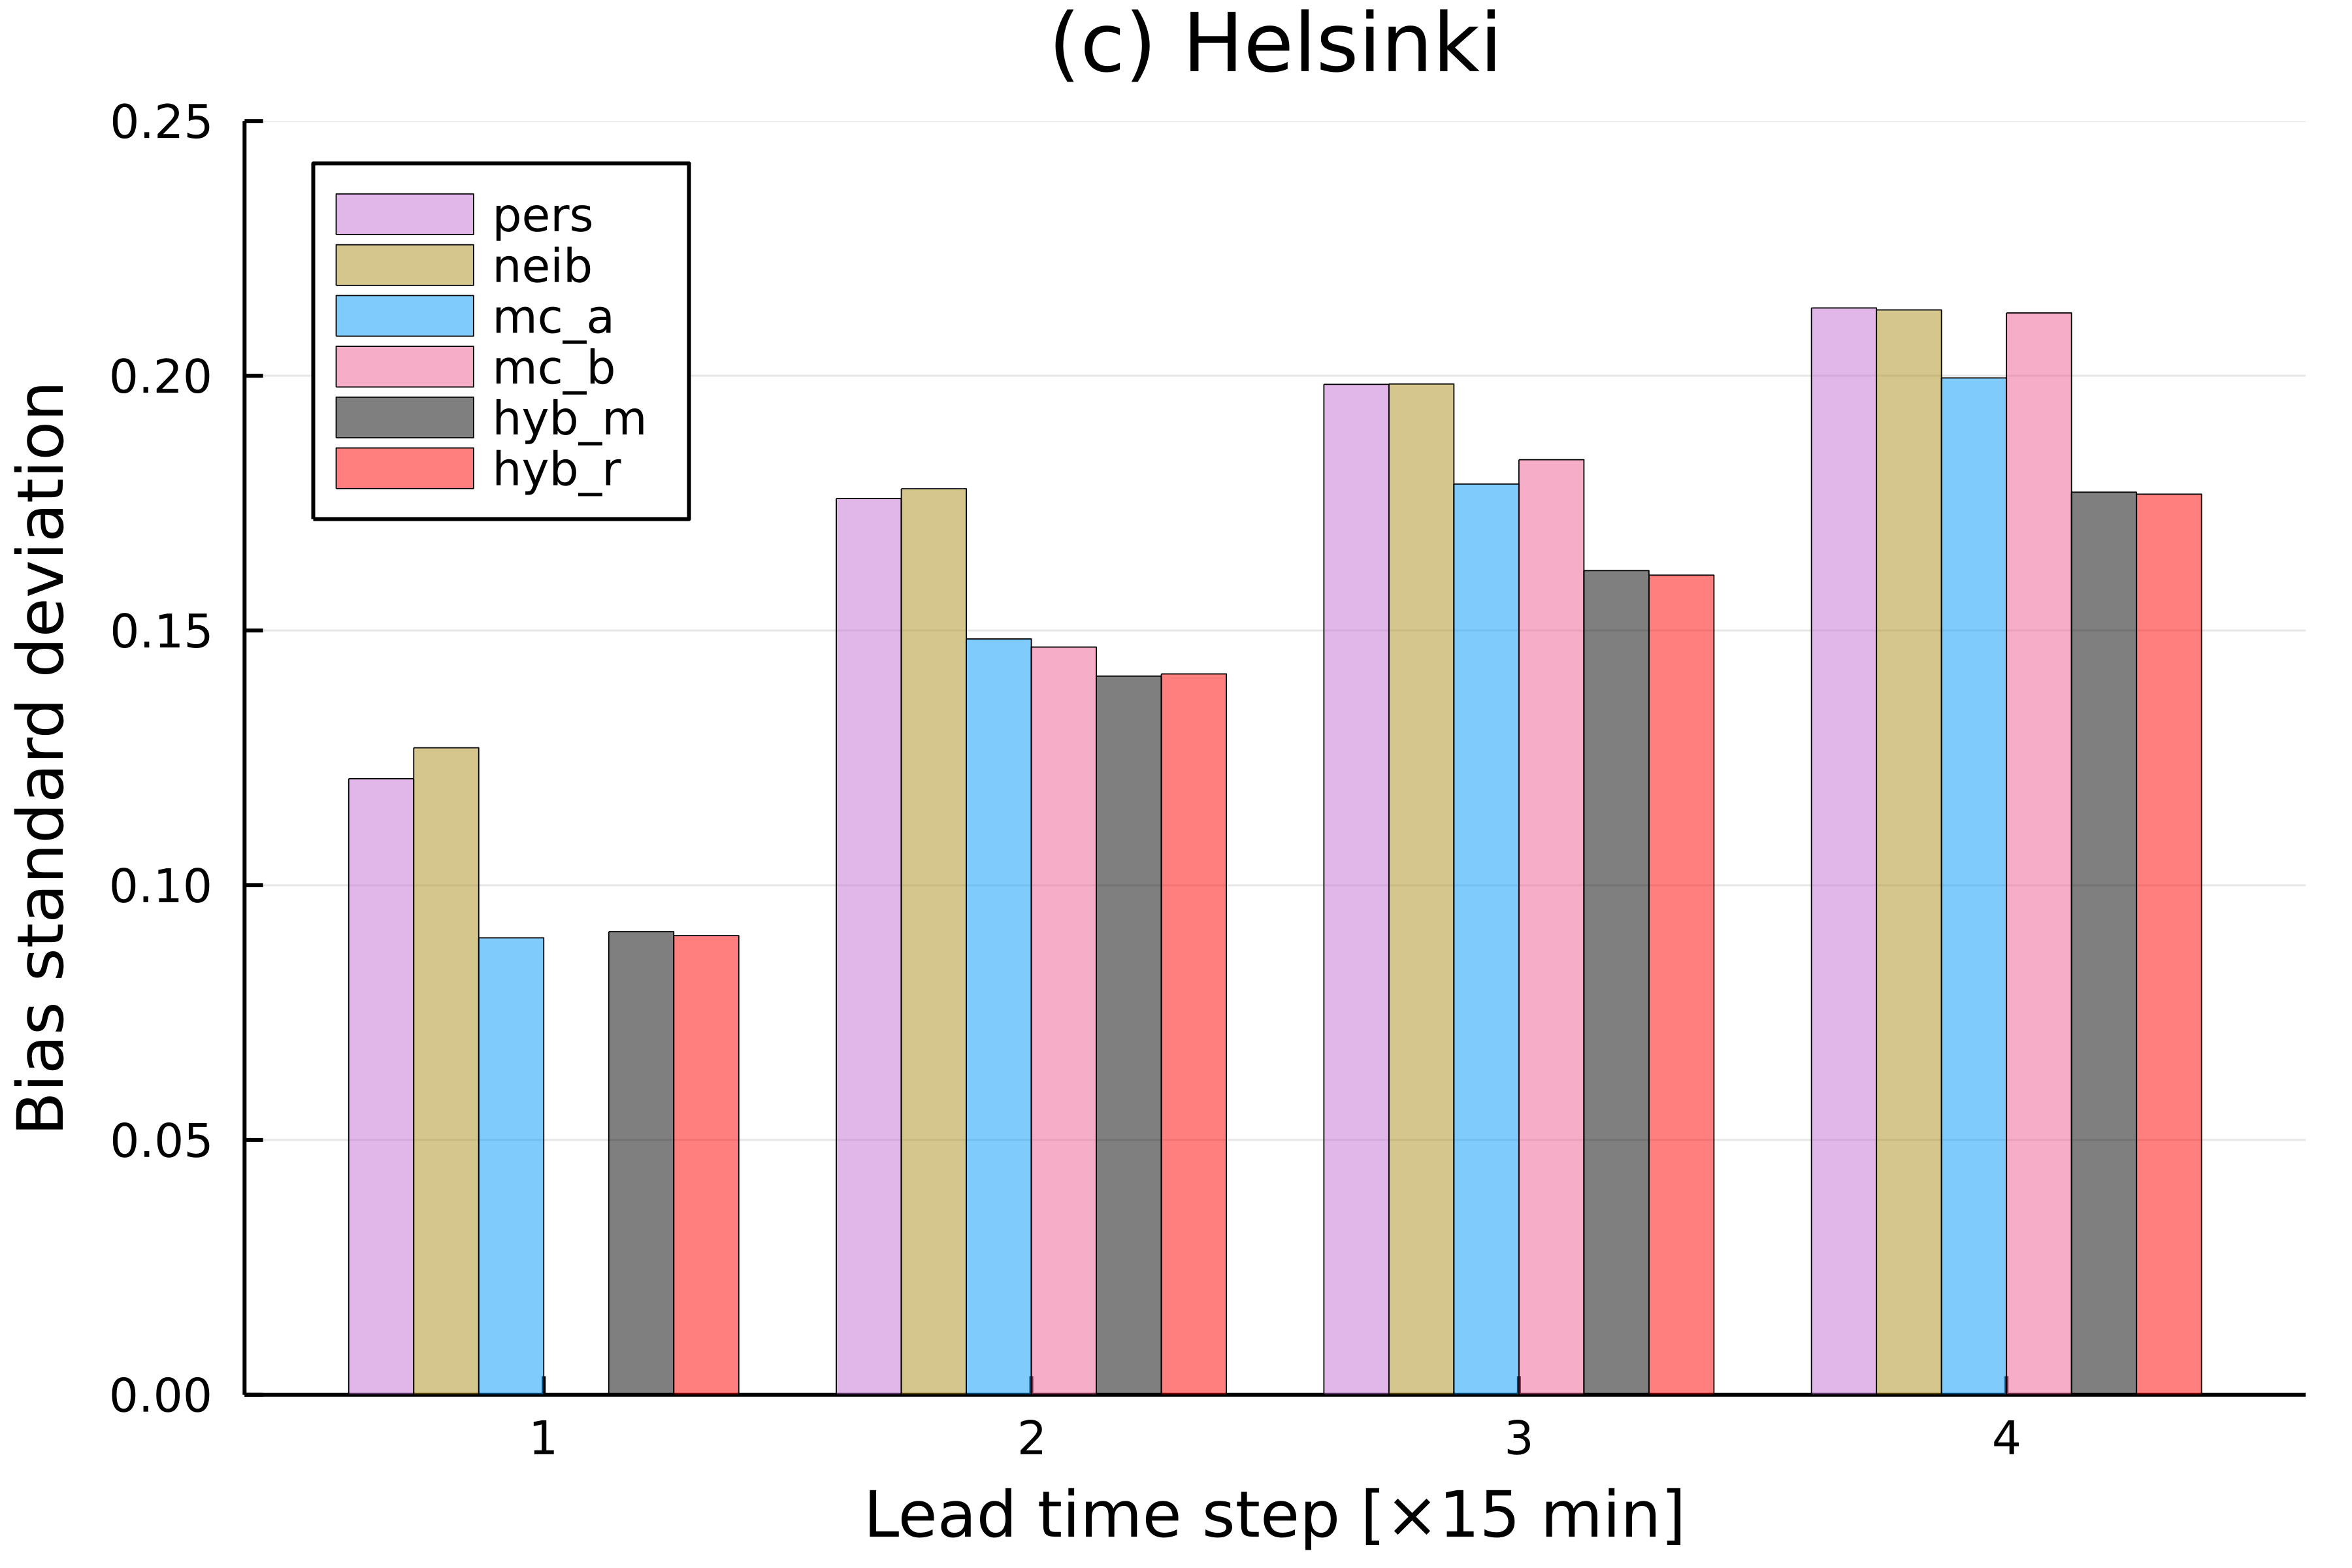

In [92]:
gb_be = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "mc_a" "mc_b" "hyb_m" "hyb_r"],
    # c=[4 5 1 7 "black" "red"], 
    lw=0.3, fillalpha=0.5, grid=:y, 
#     ylim=(0, 0.205), 
    ylim=(0, 0.25), # he
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=tit)

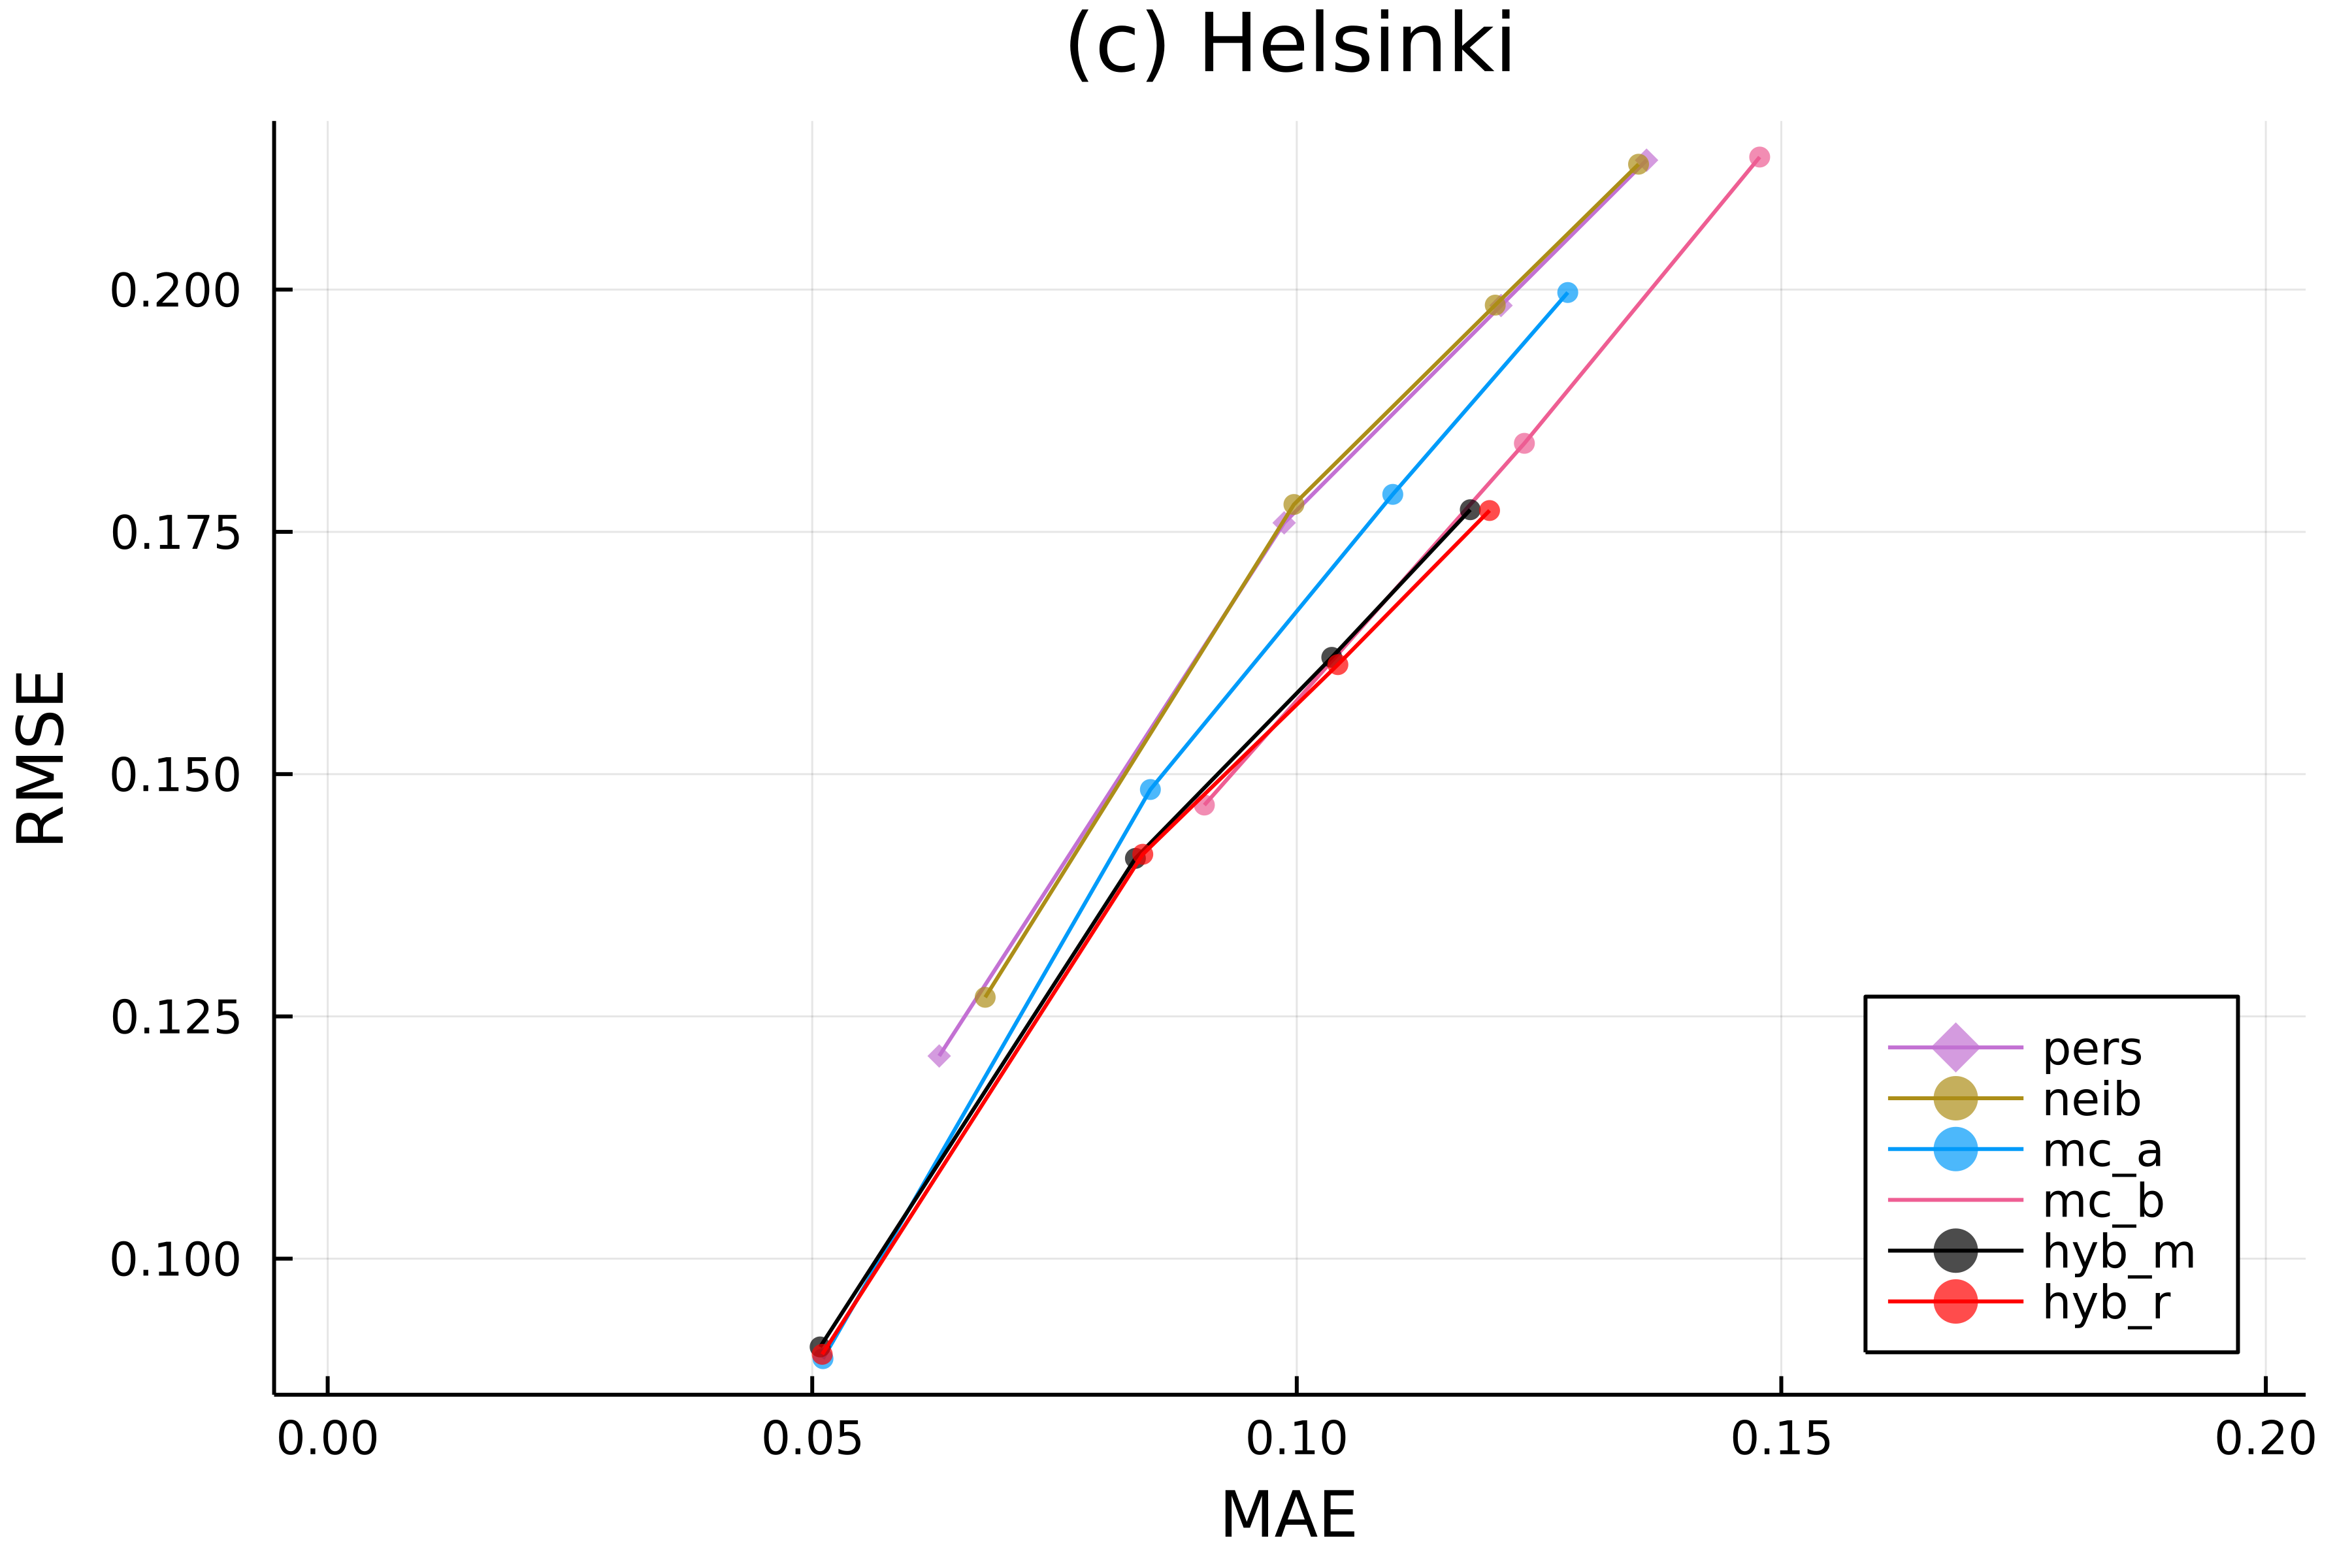

In [93]:
errs = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)